In [47]:
from load_data import load_anndata
from pathlib import Path
import squidpy as sq
import scanpy as sc

from model import SpiceMixPlus
from util import clustering_louvain_nclust, evaluate_embedding

import os
import pandas as pd
import pytest
import torch
from tqdm.auto import tqdm, trange
from pathlib import Path
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score, adjusted_rand_score

In [ ]:
path2dataset = Path('../tests/test_data/synthetic_500_100_20_15_0_0_i4')
obj = SpiceMixPlus(
    K=20, lambda_Sigma_x_inv=1e-2,
    repli_list=[0],
    context=dict(device='cuda:0', dtype=torch.float32),
    context_Y=dict(dtype=torch.float32, device='cuda:0'),
)   
obj.load_dataset(path2dataset)
obj.initialize(
#     method='kmeans',
    method='svd',
)   

obj.initialize_Sigma_x_inv()
# torch.manual_seed(0)
# import numpy as np
# np.random.seed(0)
for iteration in range(1, 500): 
    obj.estimate_parameters(iiter=iteration, use_spatial=[True]*obj.num_repli)
    obj.estimate_weights(iiter=iteration, use_spatial=[True]*obj.num_repli)

Updating Σx-1:   0%|          | 0/1000 [00:00<?, ?it/s]

tensor([[-8.6968e-01, -4.3491e-01,  1.4962e-01,  2.8621e-01,  7.0026e-01,
         -1.0391e-01, -5.5348e-01, -6.7845e-01,  5.6521e-01,  4.0147e-01,
         -1.8239e-01, -2.5464e-01,  2.2609e-01, -3.3181e-01,  5.7847e-02,
         -3.6732e-01, -3.9994e-01, -4.8804e-02,  5.6656e-01,  3.6071e-01],
        [-4.3491e-01, -1.0095e-01,  1.5691e-03,  1.5756e-01,  6.1110e-02,
         -2.0630e-02, -3.2898e-02, -1.0675e-01,  5.0348e-02,  5.3932e-02,
         -1.5886e-02, -3.7918e-02,  2.9052e-02, -5.7739e-02,  4.9167e-03,
         -6.1186e-02, -5.7218e-02,  1.4301e-01,  1.8976e-02,  3.5003e-02],
        [ 1.4962e-01,  1.5691e-03,  1.4350e-02,  6.0181e-03,  8.6236e-03,
         -7.8757e-03, -5.4677e-03, -1.1638e-02,  1.0774e-02,  2.4075e-02,
         -4.7643e-03, -1.5969e-02,  1.1425e-02, -1.3833e-02,  8.8609e-04,
         -1.3231e-02, -1.3302e-02,  6.9862e-03, -1.3975e-02,  2.0170e-02],
        [ 2.8621e-01,  1.5756e-01,  6.0181e-03,  2.1163e-03,  4.0707e-03,
         -9.8494e-04, -4.7985e-04, 

Updating M:   0%|          | 0/10000 [00:00<?, ?it/s]

Updating weight w/ neighbors:   0%|          | 0/1000 [00:00<?, ?it/s]

Updating Σx-1:   0%|          | 0/1000 [00:00<?, ?it/s]

tensor([[-8.6968e-01, -4.3491e-01,  1.4962e-01,  2.8621e-01,  7.0026e-01,
         -1.0391e-01, -5.5348e-01, -6.7845e-01,  5.6521e-01,  4.0147e-01,
         -1.8239e-01, -2.5464e-01,  2.2609e-01, -3.3181e-01,  5.7847e-02,
         -3.6732e-01, -3.9994e-01, -4.8804e-02,  5.6656e-01,  3.6071e-01],
        [-4.3491e-01, -1.0095e-01,  1.5691e-03,  1.5756e-01,  6.1110e-02,
         -2.0630e-02, -3.2898e-02, -1.0675e-01,  5.0348e-02,  5.3932e-02,
         -1.5886e-02, -3.7918e-02,  2.9052e-02, -5.7739e-02,  4.9167e-03,
         -6.1186e-02, -5.7218e-02,  1.4301e-01,  1.8976e-02,  3.5003e-02],
        [ 1.4962e-01,  1.5691e-03,  1.4350e-02,  6.0181e-03,  8.6236e-03,
         -7.8757e-03, -5.4677e-03, -1.1638e-02,  1.0774e-02,  2.4075e-02,
         -4.7643e-03, -1.5969e-02,  1.1425e-02, -1.3833e-02,  8.8609e-04,
         -1.3231e-02, -1.3302e-02,  6.9862e-03, -1.3975e-02,  2.0170e-02],
        [ 2.8621e-01,  1.5756e-01,  6.0181e-03,  2.1163e-03,  4.0707e-03,
         -9.8494e-04, -4.7985e-04, 

Updating M:   0%|          | 0/10000 [00:00<?, ?it/s]

Updating weight w/ neighbors:   0%|          | 0/1000 [00:00<?, ?it/s]

Updating Σx-1:   0%|          | 0/1000 [00:00<?, ?it/s]

tensor([[-8.6968e-01, -4.3491e-01,  1.4962e-01,  2.8621e-01,  7.0026e-01,
         -1.0391e-01, -5.5348e-01, -6.7845e-01,  5.6521e-01,  4.0147e-01,
         -1.8239e-01, -2.5464e-01,  2.2609e-01, -3.3181e-01,  5.7847e-02,
         -3.6732e-01, -3.9994e-01, -4.8804e-02,  5.6656e-01,  3.6071e-01],
        [-4.3491e-01, -1.0095e-01,  1.5691e-03,  1.5756e-01,  6.1110e-02,
         -2.0630e-02, -3.2898e-02, -1.0675e-01,  5.0348e-02,  5.3932e-02,
         -1.5886e-02, -3.7918e-02,  2.9052e-02, -5.7739e-02,  4.9167e-03,
         -6.1186e-02, -5.7218e-02,  1.4301e-01,  1.8976e-02,  3.5003e-02],
        [ 1.4962e-01,  1.5691e-03,  1.4350e-02,  6.0181e-03,  8.6236e-03,
         -7.8757e-03, -5.4677e-03, -1.1638e-02,  1.0774e-02,  2.4075e-02,
         -4.7643e-03, -1.5969e-02,  1.1425e-02, -1.3833e-02,  8.8609e-04,
         -1.3231e-02, -1.3302e-02,  6.9862e-03, -1.3975e-02,  2.0170e-02],
        [ 2.8621e-01,  1.5756e-01,  6.0181e-03,  2.1163e-03,  4.0707e-03,
         -9.8494e-04, -4.7985e-04, 

Updating M:   0%|          | 0/10000 [00:00<?, ?it/s]

Updating weight w/ neighbors:   0%|          | 0/1000 [00:00<?, ?it/s]

Updating Σx-1:   0%|          | 0/1000 [00:00<?, ?it/s]

tensor([[-8.6968e-01, -4.3491e-01,  1.4962e-01,  2.8621e-01,  7.0026e-01,
         -1.0391e-01, -5.5348e-01, -6.7845e-01,  5.6521e-01,  4.0147e-01,
         -1.8239e-01, -2.5464e-01,  2.2609e-01, -3.3181e-01,  5.7847e-02,
         -3.6732e-01, -3.9994e-01, -4.8804e-02,  5.6656e-01,  3.6071e-01],
        [-4.3491e-01, -1.0095e-01,  1.5691e-03,  1.5756e-01,  6.1110e-02,
         -2.0630e-02, -3.2898e-02, -1.0675e-01,  5.0348e-02,  5.3932e-02,
         -1.5886e-02, -3.7918e-02,  2.9052e-02, -5.7739e-02,  4.9167e-03,
         -6.1186e-02, -5.7218e-02,  1.4301e-01,  1.8976e-02,  3.5003e-02],
        [ 1.4962e-01,  1.5691e-03,  1.4350e-02,  6.0181e-03,  8.6236e-03,
         -7.8757e-03, -5.4677e-03, -1.1638e-02,  1.0774e-02,  2.4075e-02,
         -4.7643e-03, -1.5969e-02,  1.1425e-02, -1.3833e-02,  8.8609e-04,
         -1.3231e-02, -1.3302e-02,  6.9862e-03, -1.3975e-02,  2.0170e-02],
        [ 2.8621e-01,  1.5756e-01,  6.0181e-03,  2.1163e-03,  4.0707e-03,
         -9.8494e-04, -4.7985e-04, 

Updating M:   0%|          | 0/10000 [00:00<?, ?it/s]

Updating weight w/ neighbors:   0%|          | 0/1000 [00:00<?, ?it/s]

Updating Σx-1:   0%|          | 0/1000 [00:00<?, ?it/s]

tensor([[-8.6968e-01, -4.3491e-01,  1.4962e-01,  2.8621e-01,  7.0026e-01,
         -1.0391e-01, -5.5348e-01, -6.7845e-01,  5.6521e-01,  4.0147e-01,
         -1.8239e-01, -2.5464e-01,  2.2609e-01, -3.3181e-01,  5.7847e-02,
         -3.6732e-01, -3.9994e-01, -4.8804e-02,  5.6656e-01,  3.6071e-01],
        [-4.3491e-01, -1.0095e-01,  1.5691e-03,  1.5756e-01,  6.1110e-02,
         -2.0630e-02, -3.2898e-02, -1.0675e-01,  5.0348e-02,  5.3932e-02,
         -1.5886e-02, -3.7918e-02,  2.9052e-02, -5.7739e-02,  4.9167e-03,
         -6.1186e-02, -5.7218e-02,  1.4301e-01,  1.8976e-02,  3.5003e-02],
        [ 1.4962e-01,  1.5691e-03,  1.4350e-02,  6.0181e-03,  8.6236e-03,
         -7.8757e-03, -5.4677e-03, -1.1638e-02,  1.0774e-02,  2.4075e-02,
         -4.7643e-03, -1.5969e-02,  1.1425e-02, -1.3833e-02,  8.8609e-04,
         -1.3231e-02, -1.3302e-02,  6.9862e-03, -1.3975e-02,  2.0170e-02],
        [ 2.8621e-01,  1.5756e-01,  6.0181e-03,  2.1163e-03,  4.0707e-03,
         -9.8494e-04, -4.7985e-04, 

Updating M:   0%|          | 0/10000 [00:00<?, ?it/s]

Updating weight w/ neighbors:   0%|          | 0/1000 [00:00<?, ?it/s]

Updating Σx-1:   0%|          | 0/1000 [00:00<?, ?it/s]

tensor([[-8.6968e-01, -4.3491e-01,  1.4962e-01,  2.8621e-01,  7.0026e-01,
         -1.0391e-01, -5.5348e-01, -6.7845e-01,  5.6521e-01,  4.0147e-01,
         -1.8239e-01, -2.5464e-01,  2.2609e-01, -3.3181e-01,  5.7847e-02,
         -3.6732e-01, -3.9994e-01, -4.8804e-02,  5.6656e-01,  3.6071e-01],
        [-4.3491e-01, -1.0095e-01,  1.5691e-03,  1.5756e-01,  6.1110e-02,
         -2.0630e-02, -3.2898e-02, -1.0675e-01,  5.0348e-02,  5.3932e-02,
         -1.5886e-02, -3.7918e-02,  2.9052e-02, -5.7739e-02,  4.9167e-03,
         -6.1186e-02, -5.7218e-02,  1.4301e-01,  1.8976e-02,  3.5003e-02],
        [ 1.4962e-01,  1.5691e-03,  1.4350e-02,  6.0181e-03,  8.6236e-03,
         -7.8757e-03, -5.4677e-03, -1.1638e-02,  1.0774e-02,  2.4075e-02,
         -4.7643e-03, -1.5969e-02,  1.1425e-02, -1.3833e-02,  8.8609e-04,
         -1.3231e-02, -1.3302e-02,  6.9862e-03, -1.3975e-02,  2.0170e-02],
        [ 2.8621e-01,  1.5756e-01,  6.0181e-03,  2.1163e-03,  4.0707e-03,
         -9.8494e-04, -4.7985e-04, 

Updating M:   0%|          | 0/10000 [00:00<?, ?it/s]

Updating weight w/ neighbors:   0%|          | 0/1000 [00:00<?, ?it/s]

Updating Σx-1:   0%|          | 0/1000 [00:00<?, ?it/s]

tensor([[-8.6968e-01, -4.3491e-01,  1.4962e-01,  2.8621e-01,  7.0026e-01,
         -1.0391e-01, -5.5348e-01, -6.7845e-01,  5.6521e-01,  4.0147e-01,
         -1.8239e-01, -2.5464e-01,  2.2609e-01, -3.3181e-01,  5.7847e-02,
         -3.6732e-01, -3.9994e-01, -4.8804e-02,  5.6656e-01,  3.6071e-01],
        [-4.3491e-01, -1.0095e-01,  1.5691e-03,  1.5756e-01,  6.1110e-02,
         -2.0630e-02, -3.2898e-02, -1.0675e-01,  5.0348e-02,  5.3932e-02,
         -1.5886e-02, -3.7918e-02,  2.9052e-02, -5.7739e-02,  4.9167e-03,
         -6.1186e-02, -5.7218e-02,  1.4301e-01,  1.8976e-02,  3.5003e-02],
        [ 1.4962e-01,  1.5691e-03,  1.4350e-02,  6.0181e-03,  8.6236e-03,
         -7.8757e-03, -5.4677e-03, -1.1638e-02,  1.0774e-02,  2.4075e-02,
         -4.7643e-03, -1.5969e-02,  1.1425e-02, -1.3833e-02,  8.8609e-04,
         -1.3231e-02, -1.3302e-02,  6.9862e-03, -1.3975e-02,  2.0170e-02],
        [ 2.8621e-01,  1.5756e-01,  6.0181e-03,  2.1163e-03,  4.0707e-03,
         -9.8494e-04, -4.7985e-04, 

Updating M:   0%|          | 0/10000 [00:00<?, ?it/s]

Updating weight w/ neighbors:   0%|          | 0/1000 [00:00<?, ?it/s]

Updating Σx-1:   0%|          | 0/1000 [00:00<?, ?it/s]

tensor([[-8.6968e-01, -4.3491e-01,  1.4962e-01,  2.8621e-01,  7.0026e-01,
         -1.0391e-01, -5.5348e-01, -6.7845e-01,  5.6521e-01,  4.0147e-01,
         -1.8239e-01, -2.5464e-01,  2.2609e-01, -3.3181e-01,  5.7847e-02,
         -3.6732e-01, -3.9994e-01, -4.8804e-02,  5.6656e-01,  3.6071e-01],
        [-4.3491e-01, -1.0095e-01,  1.5691e-03,  1.5756e-01,  6.1110e-02,
         -2.0630e-02, -3.2898e-02, -1.0675e-01,  5.0348e-02,  5.3932e-02,
         -1.5886e-02, -3.7918e-02,  2.9052e-02, -5.7739e-02,  4.9167e-03,
         -6.1186e-02, -5.7218e-02,  1.4301e-01,  1.8976e-02,  3.5003e-02],
        [ 1.4962e-01,  1.5691e-03,  1.4350e-02,  6.0181e-03,  8.6236e-03,
         -7.8757e-03, -5.4677e-03, -1.1638e-02,  1.0774e-02,  2.4075e-02,
         -4.7643e-03, -1.5969e-02,  1.1425e-02, -1.3833e-02,  8.8609e-04,
         -1.3231e-02, -1.3302e-02,  6.9862e-03, -1.3975e-02,  2.0170e-02],
        [ 2.8621e-01,  1.5756e-01,  6.0181e-03,  2.1163e-03,  4.0707e-03,
         -9.8494e-04, -4.7985e-04, 

Updating M:   0%|          | 0/10000 [00:00<?, ?it/s]

Updating weight w/ neighbors:   0%|          | 0/1000 [00:00<?, ?it/s]

Updating Σx-1:   0%|          | 0/1000 [00:00<?, ?it/s]

tensor([[-8.6968e-01, -4.3491e-01,  1.4962e-01,  2.8621e-01,  7.0026e-01,
         -1.0391e-01, -5.5348e-01, -6.7845e-01,  5.6521e-01,  4.0147e-01,
         -1.8239e-01, -2.5464e-01,  2.2609e-01, -3.3181e-01,  5.7847e-02,
         -3.6732e-01, -3.9994e-01, -4.8804e-02,  5.6656e-01,  3.6071e-01],
        [-4.3491e-01, -1.0095e-01,  1.5691e-03,  1.5756e-01,  6.1110e-02,
         -2.0630e-02, -3.2898e-02, -1.0675e-01,  5.0348e-02,  5.3932e-02,
         -1.5886e-02, -3.7918e-02,  2.9052e-02, -5.7739e-02,  4.9167e-03,
         -6.1186e-02, -5.7218e-02,  1.4301e-01,  1.8976e-02,  3.5003e-02],
        [ 1.4962e-01,  1.5691e-03,  1.4350e-02,  6.0181e-03,  8.6236e-03,
         -7.8757e-03, -5.4677e-03, -1.1638e-02,  1.0774e-02,  2.4075e-02,
         -4.7643e-03, -1.5969e-02,  1.1425e-02, -1.3833e-02,  8.8609e-04,
         -1.3231e-02, -1.3302e-02,  6.9862e-03, -1.3975e-02,  2.0170e-02],
        [ 2.8621e-01,  1.5756e-01,  6.0181e-03,  2.1163e-03,  4.0707e-03,
         -9.8494e-04, -4.7985e-04, 

Updating M:   0%|          | 0/10000 [00:00<?, ?it/s]

Updating weight w/ neighbors:   0%|          | 0/1000 [00:00<?, ?it/s]

Updating Σx-1:   0%|          | 0/1000 [00:00<?, ?it/s]

tensor([[-8.6968e-01, -4.3491e-01,  1.4962e-01,  2.8621e-01,  7.0026e-01,
         -1.0391e-01, -5.5348e-01, -6.7845e-01,  5.6521e-01,  4.0147e-01,
         -1.8239e-01, -2.5464e-01,  2.2609e-01, -3.3181e-01,  5.7847e-02,
         -3.6732e-01, -3.9994e-01, -4.8804e-02,  5.6656e-01,  3.6071e-01],
        [-4.3491e-01, -1.0095e-01,  1.5691e-03,  1.5756e-01,  6.1110e-02,
         -2.0630e-02, -3.2898e-02, -1.0675e-01,  5.0348e-02,  5.3932e-02,
         -1.5886e-02, -3.7918e-02,  2.9052e-02, -5.7739e-02,  4.9167e-03,
         -6.1186e-02, -5.7218e-02,  1.4301e-01,  1.8976e-02,  3.5003e-02],
        [ 1.4962e-01,  1.5691e-03,  1.4350e-02,  6.0181e-03,  8.6236e-03,
         -7.8757e-03, -5.4677e-03, -1.1638e-02,  1.0774e-02,  2.4075e-02,
         -4.7643e-03, -1.5969e-02,  1.1425e-02, -1.3833e-02,  8.8609e-04,
         -1.3231e-02, -1.3302e-02,  6.9862e-03, -1.3975e-02,  2.0170e-02],
        [ 2.8621e-01,  1.5756e-01,  6.0181e-03,  2.1163e-03,  4.0707e-03,
         -9.8494e-04, -4.7985e-04, 

Updating M:   0%|          | 0/10000 [00:00<?, ?it/s]

Updating weight w/ neighbors:   0%|          | 0/1000 [00:00<?, ?it/s]

Updating Σx-1:   0%|          | 0/1000 [00:00<?, ?it/s]

tensor([[-8.6968e-01, -4.3491e-01,  1.4962e-01,  2.8621e-01,  7.0026e-01,
         -1.0391e-01, -5.5348e-01, -6.7845e-01,  5.6521e-01,  4.0147e-01,
         -1.8239e-01, -2.5464e-01,  2.2609e-01, -3.3181e-01,  5.7847e-02,
         -3.6732e-01, -3.9994e-01, -4.8804e-02,  5.6656e-01,  3.6071e-01],
        [-4.3491e-01, -1.0095e-01,  1.5691e-03,  1.5756e-01,  6.1110e-02,
         -2.0630e-02, -3.2898e-02, -1.0675e-01,  5.0348e-02,  5.3932e-02,
         -1.5886e-02, -3.7918e-02,  2.9052e-02, -5.7739e-02,  4.9167e-03,
         -6.1186e-02, -5.7218e-02,  1.4301e-01,  1.8976e-02,  3.5003e-02],
        [ 1.4962e-01,  1.5691e-03,  1.4350e-02,  6.0181e-03,  8.6236e-03,
         -7.8757e-03, -5.4677e-03, -1.1638e-02,  1.0774e-02,  2.4075e-02,
         -4.7643e-03, -1.5969e-02,  1.1425e-02, -1.3833e-02,  8.8609e-04,
         -1.3231e-02, -1.3302e-02,  6.9862e-03, -1.3975e-02,  2.0170e-02],
        [ 2.8621e-01,  1.5756e-01,  6.0181e-03,  2.1163e-03,  4.0707e-03,
         -9.8494e-04, -4.7985e-04, 

Updating M:   0%|          | 0/10000 [00:00<?, ?it/s]

Updating weight w/ neighbors:   0%|          | 0/1000 [00:00<?, ?it/s]

Updating Σx-1:   0%|          | 0/1000 [00:00<?, ?it/s]

tensor([[-8.6968e-01, -4.3491e-01,  1.4962e-01,  2.8621e-01,  7.0026e-01,
         -1.0391e-01, -5.5348e-01, -6.7845e-01,  5.6521e-01,  4.0147e-01,
         -1.8239e-01, -2.5464e-01,  2.2609e-01, -3.3181e-01,  5.7847e-02,
         -3.6732e-01, -3.9994e-01, -4.8804e-02,  5.6656e-01,  3.6071e-01],
        [-4.3491e-01, -1.0095e-01,  1.5691e-03,  1.5756e-01,  6.1110e-02,
         -2.0630e-02, -3.2898e-02, -1.0675e-01,  5.0348e-02,  5.3932e-02,
         -1.5886e-02, -3.7918e-02,  2.9052e-02, -5.7739e-02,  4.9167e-03,
         -6.1186e-02, -5.7218e-02,  1.4301e-01,  1.8976e-02,  3.5003e-02],
        [ 1.4962e-01,  1.5691e-03,  1.4350e-02,  6.0181e-03,  8.6236e-03,
         -7.8757e-03, -5.4677e-03, -1.1638e-02,  1.0774e-02,  2.4075e-02,
         -4.7643e-03, -1.5969e-02,  1.1425e-02, -1.3833e-02,  8.8609e-04,
         -1.3231e-02, -1.3302e-02,  6.9862e-03, -1.3975e-02,  2.0170e-02],
        [ 2.8621e-01,  1.5756e-01,  6.0181e-03,  2.1163e-03,  4.0707e-03,
         -9.8494e-04, -4.7985e-04, 

Updating M:   0%|          | 0/10000 [00:00<?, ?it/s]

Updating weight w/ neighbors:   0%|          | 0/1000 [00:00<?, ?it/s]

Updating Σx-1:   0%|          | 0/1000 [00:00<?, ?it/s]

tensor([[-8.6968e-01, -4.3491e-01,  1.4962e-01,  2.8621e-01,  7.0026e-01,
         -1.0391e-01, -5.5348e-01, -6.7845e-01,  5.6521e-01,  4.0147e-01,
         -1.8239e-01, -2.5464e-01,  2.2609e-01, -3.3181e-01,  5.7847e-02,
         -3.6732e-01, -3.9994e-01, -4.8804e-02,  5.6656e-01,  3.6071e-01],
        [-4.3491e-01, -1.0095e-01,  1.5691e-03,  1.5756e-01,  6.1110e-02,
         -2.0630e-02, -3.2898e-02, -1.0675e-01,  5.0348e-02,  5.3932e-02,
         -1.5886e-02, -3.7918e-02,  2.9052e-02, -5.7739e-02,  4.9167e-03,
         -6.1186e-02, -5.7218e-02,  1.4301e-01,  1.8976e-02,  3.5003e-02],
        [ 1.4962e-01,  1.5691e-03,  1.4350e-02,  6.0181e-03,  8.6236e-03,
         -7.8757e-03, -5.4677e-03, -1.1638e-02,  1.0774e-02,  2.4075e-02,
         -4.7643e-03, -1.5969e-02,  1.1425e-02, -1.3833e-02,  8.8609e-04,
         -1.3231e-02, -1.3302e-02,  6.9862e-03, -1.3975e-02,  2.0170e-02],
        [ 2.8621e-01,  1.5756e-01,  6.0181e-03,  2.1163e-03,  4.0707e-03,
         -9.8494e-04, -4.7985e-04, 

Updating M:   0%|          | 0/10000 [00:00<?, ?it/s]

Updating weight w/ neighbors:   0%|          | 0/1000 [00:00<?, ?it/s]

Updating Σx-1:   0%|          | 0/1000 [00:00<?, ?it/s]

tensor([[-8.6968e-01, -4.3491e-01,  1.4962e-01,  2.8621e-01,  7.0026e-01,
         -1.0391e-01, -5.5348e-01, -6.7845e-01,  5.6521e-01,  4.0147e-01,
         -1.8239e-01, -2.5464e-01,  2.2609e-01, -3.3181e-01,  5.7847e-02,
         -3.6732e-01, -3.9994e-01, -4.8804e-02,  5.6656e-01,  3.6071e-01],
        [-4.3491e-01, -1.0095e-01,  1.5691e-03,  1.5756e-01,  6.1110e-02,
         -2.0630e-02, -3.2898e-02, -1.0675e-01,  5.0348e-02,  5.3932e-02,
         -1.5886e-02, -3.7918e-02,  2.9052e-02, -5.7739e-02,  4.9167e-03,
         -6.1186e-02, -5.7218e-02,  1.4301e-01,  1.8976e-02,  3.5003e-02],
        [ 1.4962e-01,  1.5691e-03,  1.4350e-02,  6.0181e-03,  8.6236e-03,
         -7.8757e-03, -5.4677e-03, -1.1638e-02,  1.0774e-02,  2.4075e-02,
         -4.7643e-03, -1.5969e-02,  1.1425e-02, -1.3833e-02,  8.8609e-04,
         -1.3231e-02, -1.3302e-02,  6.9862e-03, -1.3975e-02,  2.0170e-02],
        [ 2.8621e-01,  1.5756e-01,  6.0181e-03,  2.1163e-03,  4.0707e-03,
         -9.8494e-04, -4.7985e-04, 

Updating M:   0%|          | 0/10000 [00:00<?, ?it/s]

Updating weight w/ neighbors:   0%|          | 0/1000 [00:00<?, ?it/s]

Updating Σx-1:   0%|          | 0/1000 [00:00<?, ?it/s]

tensor([[-8.6968e-01, -4.3491e-01,  1.4962e-01,  2.8621e-01,  7.0026e-01,
         -1.0391e-01, -5.5348e-01, -6.7845e-01,  5.6521e-01,  4.0147e-01,
         -1.8239e-01, -2.5464e-01,  2.2609e-01, -3.3181e-01,  5.7847e-02,
         -3.6732e-01, -3.9994e-01, -4.8804e-02,  5.6656e-01,  3.6071e-01],
        [-4.3491e-01, -1.0095e-01,  1.5691e-03,  1.5756e-01,  6.1110e-02,
         -2.0630e-02, -3.2898e-02, -1.0675e-01,  5.0348e-02,  5.3932e-02,
         -1.5886e-02, -3.7918e-02,  2.9052e-02, -5.7739e-02,  4.9167e-03,
         -6.1186e-02, -5.7218e-02,  1.4301e-01,  1.8976e-02,  3.5003e-02],
        [ 1.4962e-01,  1.5691e-03,  1.4350e-02,  6.0181e-03,  8.6236e-03,
         -7.8757e-03, -5.4677e-03, -1.1638e-02,  1.0774e-02,  2.4075e-02,
         -4.7643e-03, -1.5969e-02,  1.1425e-02, -1.3833e-02,  8.8609e-04,
         -1.3231e-02, -1.3302e-02,  6.9862e-03, -1.3975e-02,  2.0170e-02],
        [ 2.8621e-01,  1.5756e-01,  6.0181e-03,  2.1163e-03,  4.0707e-03,
         -9.8494e-04, -4.7985e-04, 

Updating M:   0%|          | 0/10000 [00:00<?, ?it/s]

Updating weight w/ neighbors:   0%|          | 0/1000 [00:00<?, ?it/s]

Updating Σx-1:   0%|          | 0/1000 [00:00<?, ?it/s]

tensor([[-8.6968e-01, -4.3491e-01,  1.4962e-01,  2.8621e-01,  7.0026e-01,
         -1.0391e-01, -5.5348e-01, -6.7845e-01,  5.6521e-01,  4.0147e-01,
         -1.8239e-01, -2.5464e-01,  2.2609e-01, -3.3181e-01,  5.7847e-02,
         -3.6732e-01, -3.9994e-01, -4.8804e-02,  5.6656e-01,  3.6071e-01],
        [-4.3491e-01, -1.0095e-01,  1.5691e-03,  1.5756e-01,  6.1110e-02,
         -2.0630e-02, -3.2898e-02, -1.0675e-01,  5.0348e-02,  5.3932e-02,
         -1.5886e-02, -3.7918e-02,  2.9052e-02, -5.7739e-02,  4.9167e-03,
         -6.1186e-02, -5.7218e-02,  1.4301e-01,  1.8976e-02,  3.5003e-02],
        [ 1.4962e-01,  1.5691e-03,  1.4350e-02,  6.0181e-03,  8.6236e-03,
         -7.8757e-03, -5.4677e-03, -1.1638e-02,  1.0774e-02,  2.4075e-02,
         -4.7643e-03, -1.5969e-02,  1.1425e-02, -1.3833e-02,  8.8609e-04,
         -1.3231e-02, -1.3302e-02,  6.9862e-03, -1.3975e-02,  2.0170e-02],
        [ 2.8621e-01,  1.5756e-01,  6.0181e-03,  2.1163e-03,  4.0707e-03,
         -9.8494e-04, -4.7985e-04, 

Updating M:   0%|          | 0/10000 [00:00<?, ?it/s]

Updating weight w/ neighbors:   0%|          | 0/1000 [00:00<?, ?it/s]

Updating Σx-1:   0%|          | 0/1000 [00:00<?, ?it/s]

tensor([[-8.6968e-01, -4.3491e-01,  1.4962e-01,  2.8621e-01,  7.0026e-01,
         -1.0391e-01, -5.5348e-01, -6.7845e-01,  5.6521e-01,  4.0147e-01,
         -1.8239e-01, -2.5464e-01,  2.2609e-01, -3.3181e-01,  5.7847e-02,
         -3.6732e-01, -3.9994e-01, -4.8804e-02,  5.6656e-01,  3.6071e-01],
        [-4.3491e-01, -1.0095e-01,  1.5691e-03,  1.5756e-01,  6.1110e-02,
         -2.0630e-02, -3.2898e-02, -1.0675e-01,  5.0348e-02,  5.3932e-02,
         -1.5886e-02, -3.7918e-02,  2.9052e-02, -5.7739e-02,  4.9167e-03,
         -6.1186e-02, -5.7218e-02,  1.4301e-01,  1.8976e-02,  3.5003e-02],
        [ 1.4962e-01,  1.5691e-03,  1.4350e-02,  6.0181e-03,  8.6236e-03,
         -7.8757e-03, -5.4677e-03, -1.1638e-02,  1.0774e-02,  2.4075e-02,
         -4.7643e-03, -1.5969e-02,  1.1425e-02, -1.3833e-02,  8.8609e-04,
         -1.3231e-02, -1.3302e-02,  6.9862e-03, -1.3975e-02,  2.0170e-02],
        [ 2.8621e-01,  1.5756e-01,  6.0181e-03,  2.1163e-03,  4.0707e-03,
         -9.8494e-04, -4.7985e-04, 

Updating M:   0%|          | 0/10000 [00:00<?, ?it/s]

Updating weight w/ neighbors:   0%|          | 0/1000 [00:00<?, ?it/s]

Updating Σx-1:   0%|          | 0/1000 [00:00<?, ?it/s]

tensor([[-8.6968e-01, -4.3491e-01,  1.4962e-01,  2.8621e-01,  7.0026e-01,
         -1.0391e-01, -5.5348e-01, -6.7845e-01,  5.6521e-01,  4.0147e-01,
         -1.8239e-01, -2.5464e-01,  2.2609e-01, -3.3181e-01,  5.7847e-02,
         -3.6732e-01, -3.9994e-01, -4.8804e-02,  5.6656e-01,  3.6071e-01],
        [-4.3491e-01, -1.0095e-01,  1.5691e-03,  1.5756e-01,  6.1110e-02,
         -2.0630e-02, -3.2898e-02, -1.0675e-01,  5.0348e-02,  5.3932e-02,
         -1.5886e-02, -3.7918e-02,  2.9052e-02, -5.7739e-02,  4.9167e-03,
         -6.1186e-02, -5.7218e-02,  1.4301e-01,  1.8976e-02,  3.5003e-02],
        [ 1.4962e-01,  1.5691e-03,  1.4350e-02,  6.0181e-03,  8.6236e-03,
         -7.8757e-03, -5.4677e-03, -1.1638e-02,  1.0774e-02,  2.4075e-02,
         -4.7643e-03, -1.5969e-02,  1.1425e-02, -1.3833e-02,  8.8609e-04,
         -1.3231e-02, -1.3302e-02,  6.9862e-03, -1.3975e-02,  2.0170e-02],
        [ 2.8621e-01,  1.5756e-01,  6.0181e-03,  2.1163e-03,  4.0707e-03,
         -9.8494e-04, -4.7985e-04, 

Updating M:   0%|          | 0/10000 [00:00<?, ?it/s]

Updating weight w/ neighbors:   0%|          | 0/1000 [00:00<?, ?it/s]

Updating Σx-1:   0%|          | 0/1000 [00:00<?, ?it/s]

tensor([[-8.6968e-01, -4.3491e-01,  1.4962e-01,  2.8621e-01,  7.0026e-01,
         -1.0391e-01, -5.5348e-01, -6.7845e-01,  5.6521e-01,  4.0147e-01,
         -1.8239e-01, -2.5464e-01,  2.2609e-01, -3.3181e-01,  5.7847e-02,
         -3.6732e-01, -3.9994e-01, -4.8804e-02,  5.6656e-01,  3.6071e-01],
        [-4.3491e-01, -1.0095e-01,  1.5691e-03,  1.5756e-01,  6.1110e-02,
         -2.0630e-02, -3.2898e-02, -1.0675e-01,  5.0348e-02,  5.3932e-02,
         -1.5886e-02, -3.7918e-02,  2.9052e-02, -5.7739e-02,  4.9167e-03,
         -6.1186e-02, -5.7218e-02,  1.4301e-01,  1.8976e-02,  3.5003e-02],
        [ 1.4962e-01,  1.5691e-03,  1.4350e-02,  6.0181e-03,  8.6236e-03,
         -7.8757e-03, -5.4677e-03, -1.1638e-02,  1.0774e-02,  2.4075e-02,
         -4.7643e-03, -1.5969e-02,  1.1425e-02, -1.3833e-02,  8.8609e-04,
         -1.3231e-02, -1.3302e-02,  6.9862e-03, -1.3975e-02,  2.0170e-02],
        [ 2.8621e-01,  1.5756e-01,  6.0181e-03,  2.1163e-03,  4.0707e-03,
         -9.8494e-04, -4.7985e-04, 

Updating M:   0%|          | 0/10000 [00:00<?, ?it/s]

Updating weight w/ neighbors:   0%|          | 0/1000 [00:00<?, ?it/s]

Updating Σx-1:   0%|          | 0/1000 [00:00<?, ?it/s]

tensor([[-8.6968e-01, -4.3491e-01,  1.4962e-01,  2.8621e-01,  7.0026e-01,
         -1.0391e-01, -5.5348e-01, -6.7845e-01,  5.6521e-01,  4.0147e-01,
         -1.8239e-01, -2.5464e-01,  2.2609e-01, -3.3181e-01,  5.7847e-02,
         -3.6732e-01, -3.9994e-01, -4.8804e-02,  5.6656e-01,  3.6071e-01],
        [-4.3491e-01, -1.0095e-01,  1.5691e-03,  1.5756e-01,  6.1110e-02,
         -2.0630e-02, -3.2898e-02, -1.0675e-01,  5.0348e-02,  5.3932e-02,
         -1.5886e-02, -3.7918e-02,  2.9052e-02, -5.7739e-02,  4.9167e-03,
         -6.1186e-02, -5.7218e-02,  1.4301e-01,  1.8976e-02,  3.5003e-02],
        [ 1.4962e-01,  1.5691e-03,  1.4350e-02,  6.0181e-03,  8.6236e-03,
         -7.8757e-03, -5.4677e-03, -1.1638e-02,  1.0774e-02,  2.4075e-02,
         -4.7643e-03, -1.5969e-02,  1.1425e-02, -1.3833e-02,  8.8609e-04,
         -1.3231e-02, -1.3302e-02,  6.9862e-03, -1.3975e-02,  2.0170e-02],
        [ 2.8621e-01,  1.5756e-01,  6.0181e-03,  2.1163e-03,  4.0707e-03,
         -9.8494e-04, -4.7985e-04, 

Updating M:   0%|          | 0/10000 [00:00<?, ?it/s]

Updating weight w/ neighbors:   0%|          | 0/1000 [00:00<?, ?it/s]

Updating Σx-1:   0%|          | 0/1000 [00:00<?, ?it/s]

tensor([[-8.6968e-01, -4.3491e-01,  1.4962e-01,  2.8621e-01,  7.0026e-01,
         -1.0391e-01, -5.5348e-01, -6.7845e-01,  5.6521e-01,  4.0147e-01,
         -1.8239e-01, -2.5464e-01,  2.2609e-01, -3.3181e-01,  5.7847e-02,
         -3.6732e-01, -3.9994e-01, -4.8804e-02,  5.6656e-01,  3.6071e-01],
        [-4.3491e-01, -1.0095e-01,  1.5691e-03,  1.5756e-01,  6.1110e-02,
         -2.0630e-02, -3.2898e-02, -1.0675e-01,  5.0348e-02,  5.3932e-02,
         -1.5886e-02, -3.7918e-02,  2.9052e-02, -5.7739e-02,  4.9167e-03,
         -6.1186e-02, -5.7218e-02,  1.4301e-01,  1.8976e-02,  3.5003e-02],
        [ 1.4962e-01,  1.5691e-03,  1.4350e-02,  6.0181e-03,  8.6236e-03,
         -7.8757e-03, -5.4677e-03, -1.1638e-02,  1.0774e-02,  2.4075e-02,
         -4.7643e-03, -1.5969e-02,  1.1425e-02, -1.3833e-02,  8.8609e-04,
         -1.3231e-02, -1.3302e-02,  6.9862e-03, -1.3975e-02,  2.0170e-02],
        [ 2.8621e-01,  1.5756e-01,  6.0181e-03,  2.1163e-03,  4.0707e-03,
         -9.8494e-04, -4.7985e-04, 

Updating M:   0%|          | 0/10000 [00:00<?, ?it/s]

Updating weight w/ neighbors:   0%|          | 0/1000 [00:00<?, ?it/s]

Updating Σx-1:   0%|          | 0/1000 [00:00<?, ?it/s]

tensor([[-8.6968e-01, -4.3491e-01,  1.4962e-01,  2.8621e-01,  7.0026e-01,
         -1.0391e-01, -5.5348e-01, -6.7845e-01,  5.6521e-01,  4.0147e-01,
         -1.8239e-01, -2.5464e-01,  2.2609e-01, -3.3181e-01,  5.7847e-02,
         -3.6732e-01, -3.9994e-01, -4.8804e-02,  5.6656e-01,  3.6071e-01],
        [-4.3491e-01, -1.0095e-01,  1.5691e-03,  1.5756e-01,  6.1110e-02,
         -2.0630e-02, -3.2898e-02, -1.0675e-01,  5.0348e-02,  5.3932e-02,
         -1.5886e-02, -3.7918e-02,  2.9052e-02, -5.7739e-02,  4.9167e-03,
         -6.1186e-02, -5.7218e-02,  1.4301e-01,  1.8976e-02,  3.5003e-02],
        [ 1.4962e-01,  1.5691e-03,  1.4350e-02,  6.0181e-03,  8.6236e-03,
         -7.8757e-03, -5.4677e-03, -1.1638e-02,  1.0774e-02,  2.4075e-02,
         -4.7643e-03, -1.5969e-02,  1.1425e-02, -1.3833e-02,  8.8609e-04,
         -1.3231e-02, -1.3302e-02,  6.9862e-03, -1.3975e-02,  2.0170e-02],
        [ 2.8621e-01,  1.5756e-01,  6.0181e-03,  2.1163e-03,  4.0707e-03,
         -9.8494e-04, -4.7985e-04, 

Updating M:   0%|          | 0/10000 [00:00<?, ?it/s]

Updating weight w/ neighbors:   0%|          | 0/1000 [00:00<?, ?it/s]

Updating Σx-1:   0%|          | 0/1000 [00:00<?, ?it/s]

tensor([[-8.6968e-01, -4.3491e-01,  1.4962e-01,  2.8621e-01,  7.0026e-01,
         -1.0391e-01, -5.5348e-01, -6.7845e-01,  5.6521e-01,  4.0147e-01,
         -1.8239e-01, -2.5464e-01,  2.2609e-01, -3.3181e-01,  5.7847e-02,
         -3.6732e-01, -3.9994e-01, -4.8804e-02,  5.6656e-01,  3.6071e-01],
        [-4.3491e-01, -1.0095e-01,  1.5691e-03,  1.5756e-01,  6.1110e-02,
         -2.0630e-02, -3.2898e-02, -1.0675e-01,  5.0348e-02,  5.3932e-02,
         -1.5886e-02, -3.7918e-02,  2.9052e-02, -5.7739e-02,  4.9167e-03,
         -6.1186e-02, -5.7218e-02,  1.4301e-01,  1.8976e-02,  3.5003e-02],
        [ 1.4962e-01,  1.5691e-03,  1.4350e-02,  6.0181e-03,  8.6236e-03,
         -7.8757e-03, -5.4677e-03, -1.1638e-02,  1.0774e-02,  2.4075e-02,
         -4.7643e-03, -1.5969e-02,  1.1425e-02, -1.3833e-02,  8.8609e-04,
         -1.3231e-02, -1.3302e-02,  6.9862e-03, -1.3975e-02,  2.0170e-02],
        [ 2.8621e-01,  1.5756e-01,  6.0181e-03,  2.1163e-03,  4.0707e-03,
         -9.8494e-04, -4.7985e-04, 

Updating M:   0%|          | 0/10000 [00:00<?, ?it/s]

Updating weight w/ neighbors:   0%|          | 0/1000 [00:00<?, ?it/s]

Updating Σx-1:   0%|          | 0/1000 [00:00<?, ?it/s]

tensor([[-8.6968e-01, -4.3491e-01,  1.4962e-01,  2.8621e-01,  7.0026e-01,
         -1.0391e-01, -5.5348e-01, -6.7845e-01,  5.6521e-01,  4.0147e-01,
         -1.8239e-01, -2.5464e-01,  2.2609e-01, -3.3181e-01,  5.7847e-02,
         -3.6732e-01, -3.9994e-01, -4.8804e-02,  5.6656e-01,  3.6071e-01],
        [-4.3491e-01, -1.0095e-01,  1.5691e-03,  1.5756e-01,  6.1110e-02,
         -2.0630e-02, -3.2898e-02, -1.0675e-01,  5.0348e-02,  5.3932e-02,
         -1.5886e-02, -3.7918e-02,  2.9052e-02, -5.7739e-02,  4.9167e-03,
         -6.1186e-02, -5.7218e-02,  1.4301e-01,  1.8976e-02,  3.5003e-02],
        [ 1.4962e-01,  1.5691e-03,  1.4350e-02,  6.0181e-03,  8.6236e-03,
         -7.8757e-03, -5.4677e-03, -1.1638e-02,  1.0774e-02,  2.4075e-02,
         -4.7643e-03, -1.5969e-02,  1.1425e-02, -1.3833e-02,  8.8609e-04,
         -1.3231e-02, -1.3302e-02,  6.9862e-03, -1.3975e-02,  2.0170e-02],
        [ 2.8621e-01,  1.5756e-01,  6.0181e-03,  2.1163e-03,  4.0707e-03,
         -9.8494e-04, -4.7985e-04, 

Updating M:   0%|          | 0/10000 [00:00<?, ?it/s]

Updating weight w/ neighbors:   0%|          | 0/1000 [00:00<?, ?it/s]

Updating Σx-1:   0%|          | 0/1000 [00:00<?, ?it/s]

tensor([[-8.6968e-01, -4.3491e-01,  1.4962e-01,  2.8621e-01,  7.0026e-01,
         -1.0391e-01, -5.5348e-01, -6.7845e-01,  5.6521e-01,  4.0147e-01,
         -1.8239e-01, -2.5464e-01,  2.2609e-01, -3.3181e-01,  5.7847e-02,
         -3.6732e-01, -3.9994e-01, -4.8804e-02,  5.6656e-01,  3.6071e-01],
        [-4.3491e-01, -1.0095e-01,  1.5691e-03,  1.5756e-01,  6.1110e-02,
         -2.0630e-02, -3.2898e-02, -1.0675e-01,  5.0348e-02,  5.3932e-02,
         -1.5886e-02, -3.7918e-02,  2.9052e-02, -5.7739e-02,  4.9167e-03,
         -6.1186e-02, -5.7218e-02,  1.4301e-01,  1.8976e-02,  3.5003e-02],
        [ 1.4962e-01,  1.5691e-03,  1.4350e-02,  6.0181e-03,  8.6236e-03,
         -7.8757e-03, -5.4677e-03, -1.1638e-02,  1.0774e-02,  2.4075e-02,
         -4.7643e-03, -1.5969e-02,  1.1425e-02, -1.3833e-02,  8.8609e-04,
         -1.3231e-02, -1.3302e-02,  6.9862e-03, -1.3975e-02,  2.0170e-02],
        [ 2.8621e-01,  1.5756e-01,  6.0181e-03,  2.1163e-03,  4.0707e-03,
         -9.8494e-04, -4.7985e-04, 

Updating M:   0%|          | 0/10000 [00:00<?, ?it/s]

Updating weight w/ neighbors:   0%|          | 0/1000 [00:00<?, ?it/s]

Updating Σx-1:   0%|          | 0/1000 [00:00<?, ?it/s]

tensor([[-8.6968e-01, -4.3491e-01,  1.4962e-01,  2.8621e-01,  7.0026e-01,
         -1.0391e-01, -5.5348e-01, -6.7845e-01,  5.6521e-01,  4.0147e-01,
         -1.8239e-01, -2.5464e-01,  2.2609e-01, -3.3181e-01,  5.7847e-02,
         -3.6732e-01, -3.9994e-01, -4.8804e-02,  5.6656e-01,  3.6071e-01],
        [-4.3491e-01, -1.0095e-01,  1.5691e-03,  1.5756e-01,  6.1110e-02,
         -2.0630e-02, -3.2898e-02, -1.0675e-01,  5.0348e-02,  5.3932e-02,
         -1.5886e-02, -3.7918e-02,  2.9052e-02, -5.7739e-02,  4.9167e-03,
         -6.1186e-02, -5.7218e-02,  1.4301e-01,  1.8976e-02,  3.5003e-02],
        [ 1.4962e-01,  1.5691e-03,  1.4350e-02,  6.0181e-03,  8.6236e-03,
         -7.8757e-03, -5.4677e-03, -1.1638e-02,  1.0774e-02,  2.4075e-02,
         -4.7643e-03, -1.5969e-02,  1.1425e-02, -1.3833e-02,  8.8609e-04,
         -1.3231e-02, -1.3302e-02,  6.9862e-03, -1.3975e-02,  2.0170e-02],
        [ 2.8621e-01,  1.5756e-01,  6.0181e-03,  2.1163e-03,  4.0707e-03,
         -9.8494e-04, -4.7985e-04, 

Updating M:   0%|          | 0/10000 [00:00<?, ?it/s]

Updating weight w/ neighbors:   0%|          | 0/1000 [00:00<?, ?it/s]

Updating Σx-1:   0%|          | 0/1000 [00:00<?, ?it/s]

tensor([[-8.6968e-01, -4.3491e-01,  1.4962e-01,  2.8621e-01,  7.0026e-01,
         -1.0391e-01, -5.5348e-01, -6.7845e-01,  5.6521e-01,  4.0147e-01,
         -1.8239e-01, -2.5464e-01,  2.2609e-01, -3.3181e-01,  5.7847e-02,
         -3.6732e-01, -3.9994e-01, -4.8804e-02,  5.6656e-01,  3.6071e-01],
        [-4.3491e-01, -1.0095e-01,  1.5691e-03,  1.5756e-01,  6.1110e-02,
         -2.0630e-02, -3.2898e-02, -1.0675e-01,  5.0348e-02,  5.3932e-02,
         -1.5886e-02, -3.7918e-02,  2.9052e-02, -5.7739e-02,  4.9167e-03,
         -6.1186e-02, -5.7218e-02,  1.4301e-01,  1.8976e-02,  3.5003e-02],
        [ 1.4962e-01,  1.5691e-03,  1.4350e-02,  6.0181e-03,  8.6236e-03,
         -7.8757e-03, -5.4677e-03, -1.1638e-02,  1.0774e-02,  2.4075e-02,
         -4.7643e-03, -1.5969e-02,  1.1425e-02, -1.3833e-02,  8.8609e-04,
         -1.3231e-02, -1.3302e-02,  6.9862e-03, -1.3975e-02,  2.0170e-02],
        [ 2.8621e-01,  1.5756e-01,  6.0181e-03,  2.1163e-03,  4.0707e-03,
         -9.8494e-04, -4.7985e-04, 

Updating M:   0%|          | 0/10000 [00:00<?, ?it/s]

Updating weight w/ neighbors:   0%|          | 0/1000 [00:00<?, ?it/s]

Updating Σx-1:   0%|          | 0/1000 [00:00<?, ?it/s]

tensor([[-8.6968e-01, -4.3491e-01,  1.4962e-01,  2.8621e-01,  7.0026e-01,
         -1.0391e-01, -5.5348e-01, -6.7845e-01,  5.6521e-01,  4.0147e-01,
         -1.8239e-01, -2.5464e-01,  2.2609e-01, -3.3181e-01,  5.7847e-02,
         -3.6732e-01, -3.9994e-01, -4.8804e-02,  5.6656e-01,  3.6071e-01],
        [-4.3491e-01, -1.0095e-01,  1.5691e-03,  1.5756e-01,  6.1110e-02,
         -2.0630e-02, -3.2898e-02, -1.0675e-01,  5.0348e-02,  5.3932e-02,
         -1.5886e-02, -3.7918e-02,  2.9052e-02, -5.7739e-02,  4.9167e-03,
         -6.1186e-02, -5.7218e-02,  1.4301e-01,  1.8976e-02,  3.5003e-02],
        [ 1.4962e-01,  1.5691e-03,  1.4350e-02,  6.0181e-03,  8.6236e-03,
         -7.8757e-03, -5.4677e-03, -1.1638e-02,  1.0774e-02,  2.4075e-02,
         -4.7643e-03, -1.5969e-02,  1.1425e-02, -1.3833e-02,  8.8609e-04,
         -1.3231e-02, -1.3302e-02,  6.9862e-03, -1.3975e-02,  2.0170e-02],
        [ 2.8621e-01,  1.5756e-01,  6.0181e-03,  2.1163e-03,  4.0707e-03,
         -9.8494e-04, -4.7985e-04, 

Updating M:   0%|          | 0/10000 [00:00<?, ?it/s]

Updating weight w/ neighbors:   0%|          | 0/1000 [00:00<?, ?it/s]

Updating Σx-1:   0%|          | 0/1000 [00:00<?, ?it/s]

tensor([[-8.6968e-01, -4.3491e-01,  1.4962e-01,  2.8621e-01,  7.0026e-01,
         -1.0391e-01, -5.5348e-01, -6.7845e-01,  5.6521e-01,  4.0147e-01,
         -1.8239e-01, -2.5464e-01,  2.2609e-01, -3.3181e-01,  5.7847e-02,
         -3.6732e-01, -3.9994e-01, -4.8804e-02,  5.6656e-01,  3.6071e-01],
        [-4.3491e-01, -1.0095e-01,  1.5691e-03,  1.5756e-01,  6.1110e-02,
         -2.0630e-02, -3.2898e-02, -1.0675e-01,  5.0348e-02,  5.3932e-02,
         -1.5886e-02, -3.7918e-02,  2.9052e-02, -5.7739e-02,  4.9167e-03,
         -6.1186e-02, -5.7218e-02,  1.4301e-01,  1.8976e-02,  3.5003e-02],
        [ 1.4962e-01,  1.5691e-03,  1.4350e-02,  6.0181e-03,  8.6236e-03,
         -7.8757e-03, -5.4677e-03, -1.1638e-02,  1.0774e-02,  2.4075e-02,
         -4.7643e-03, -1.5969e-02,  1.1425e-02, -1.3833e-02,  8.8609e-04,
         -1.3231e-02, -1.3302e-02,  6.9862e-03, -1.3975e-02,  2.0170e-02],
        [ 2.8621e-01,  1.5756e-01,  6.0181e-03,  2.1163e-03,  4.0707e-03,
         -9.8494e-04, -4.7985e-04, 

Updating M:   0%|          | 0/10000 [00:00<?, ?it/s]

Updating weight w/ neighbors:   0%|          | 0/1000 [00:00<?, ?it/s]

Updating Σx-1:   0%|          | 0/1000 [00:00<?, ?it/s]

tensor([[-8.6968e-01, -4.3491e-01,  1.4962e-01,  2.8621e-01,  7.0026e-01,
         -1.0391e-01, -5.5348e-01, -6.7845e-01,  5.6521e-01,  4.0147e-01,
         -1.8239e-01, -2.5464e-01,  2.2609e-01, -3.3181e-01,  5.7847e-02,
         -3.6732e-01, -3.9994e-01, -4.8804e-02,  5.6656e-01,  3.6071e-01],
        [-4.3491e-01, -1.0095e-01,  1.5691e-03,  1.5756e-01,  6.1110e-02,
         -2.0630e-02, -3.2898e-02, -1.0675e-01,  5.0348e-02,  5.3932e-02,
         -1.5886e-02, -3.7918e-02,  2.9052e-02, -5.7739e-02,  4.9167e-03,
         -6.1186e-02, -5.7218e-02,  1.4301e-01,  1.8976e-02,  3.5003e-02],
        [ 1.4962e-01,  1.5691e-03,  1.4350e-02,  6.0181e-03,  8.6236e-03,
         -7.8757e-03, -5.4677e-03, -1.1638e-02,  1.0774e-02,  2.4075e-02,
         -4.7643e-03, -1.5969e-02,  1.1425e-02, -1.3833e-02,  8.8609e-04,
         -1.3231e-02, -1.3302e-02,  6.9862e-03, -1.3975e-02,  2.0170e-02],
        [ 2.8621e-01,  1.5756e-01,  6.0181e-03,  2.1163e-03,  4.0707e-03,
         -9.8494e-04, -4.7985e-04, 

Updating M:   0%|          | 0/10000 [00:00<?, ?it/s]

Updating weight w/ neighbors:   0%|          | 0/1000 [00:00<?, ?it/s]

Updating Σx-1:   0%|          | 0/1000 [00:00<?, ?it/s]

tensor([[-8.6968e-01, -4.3491e-01,  1.4962e-01,  2.8621e-01,  7.0026e-01,
         -1.0391e-01, -5.5348e-01, -6.7845e-01,  5.6521e-01,  4.0147e-01,
         -1.8239e-01, -2.5464e-01,  2.2609e-01, -3.3181e-01,  5.7847e-02,
         -3.6732e-01, -3.9994e-01, -4.8804e-02,  5.6656e-01,  3.6071e-01],
        [-4.3491e-01, -1.0095e-01,  1.5691e-03,  1.5756e-01,  6.1110e-02,
         -2.0630e-02, -3.2898e-02, -1.0675e-01,  5.0348e-02,  5.3932e-02,
         -1.5886e-02, -3.7918e-02,  2.9052e-02, -5.7739e-02,  4.9167e-03,
         -6.1186e-02, -5.7218e-02,  1.4301e-01,  1.8976e-02,  3.5003e-02],
        [ 1.4962e-01,  1.5691e-03,  1.4350e-02,  6.0181e-03,  8.6236e-03,
         -7.8757e-03, -5.4677e-03, -1.1638e-02,  1.0774e-02,  2.4075e-02,
         -4.7643e-03, -1.5969e-02,  1.1425e-02, -1.3833e-02,  8.8609e-04,
         -1.3231e-02, -1.3302e-02,  6.9862e-03, -1.3975e-02,  2.0170e-02],
        [ 2.8621e-01,  1.5756e-01,  6.0181e-03,  2.1163e-03,  4.0707e-03,
         -9.8494e-04, -4.7985e-04, 

Updating M:   0%|          | 0/10000 [00:00<?, ?it/s]

Updating weight w/ neighbors:   0%|          | 0/1000 [00:00<?, ?it/s]

Updating Σx-1:   0%|          | 0/1000 [00:00<?, ?it/s]

tensor([[-8.6968e-01, -4.3491e-01,  1.4962e-01,  2.8621e-01,  7.0026e-01,
         -1.0391e-01, -5.5348e-01, -6.7845e-01,  5.6521e-01,  4.0147e-01,
         -1.8239e-01, -2.5464e-01,  2.2609e-01, -3.3181e-01,  5.7847e-02,
         -3.6732e-01, -3.9994e-01, -4.8804e-02,  5.6656e-01,  3.6071e-01],
        [-4.3491e-01, -1.0095e-01,  1.5691e-03,  1.5756e-01,  6.1110e-02,
         -2.0630e-02, -3.2898e-02, -1.0675e-01,  5.0348e-02,  5.3932e-02,
         -1.5886e-02, -3.7918e-02,  2.9052e-02, -5.7739e-02,  4.9167e-03,
         -6.1186e-02, -5.7218e-02,  1.4301e-01,  1.8976e-02,  3.5003e-02],
        [ 1.4962e-01,  1.5691e-03,  1.4350e-02,  6.0181e-03,  8.6236e-03,
         -7.8757e-03, -5.4677e-03, -1.1638e-02,  1.0774e-02,  2.4075e-02,
         -4.7643e-03, -1.5969e-02,  1.1425e-02, -1.3833e-02,  8.8609e-04,
         -1.3231e-02, -1.3302e-02,  6.9862e-03, -1.3975e-02,  2.0170e-02],
        [ 2.8621e-01,  1.5756e-01,  6.0181e-03,  2.1163e-03,  4.0707e-03,
         -9.8494e-04, -4.7985e-04, 

Updating M:   0%|          | 0/10000 [00:00<?, ?it/s]

Updating weight w/ neighbors:   0%|          | 0/1000 [00:00<?, ?it/s]

Updating Σx-1:   0%|          | 0/1000 [00:00<?, ?it/s]

tensor([[-8.6968e-01, -4.3491e-01,  1.4962e-01,  2.8621e-01,  7.0026e-01,
         -1.0391e-01, -5.5348e-01, -6.7845e-01,  5.6521e-01,  4.0147e-01,
         -1.8239e-01, -2.5464e-01,  2.2609e-01, -3.3181e-01,  5.7847e-02,
         -3.6732e-01, -3.9994e-01, -4.8804e-02,  5.6656e-01,  3.6071e-01],
        [-4.3491e-01, -1.0095e-01,  1.5691e-03,  1.5756e-01,  6.1110e-02,
         -2.0630e-02, -3.2898e-02, -1.0675e-01,  5.0348e-02,  5.3932e-02,
         -1.5886e-02, -3.7918e-02,  2.9052e-02, -5.7739e-02,  4.9167e-03,
         -6.1186e-02, -5.7218e-02,  1.4301e-01,  1.8976e-02,  3.5003e-02],
        [ 1.4962e-01,  1.5691e-03,  1.4350e-02,  6.0181e-03,  8.6236e-03,
         -7.8757e-03, -5.4677e-03, -1.1638e-02,  1.0774e-02,  2.4075e-02,
         -4.7643e-03, -1.5969e-02,  1.1425e-02, -1.3833e-02,  8.8609e-04,
         -1.3231e-02, -1.3302e-02,  6.9862e-03, -1.3975e-02,  2.0170e-02],
        [ 2.8621e-01,  1.5756e-01,  6.0181e-03,  2.1163e-03,  4.0707e-03,
         -9.8494e-04, -4.7985e-04, 

Updating M:   0%|          | 0/10000 [00:00<?, ?it/s]

Updating weight w/ neighbors:   0%|          | 0/1000 [00:00<?, ?it/s]

Updating Σx-1:   0%|          | 0/1000 [00:00<?, ?it/s]

tensor([[-8.6968e-01, -4.3491e-01,  1.4962e-01,  2.8621e-01,  7.0026e-01,
         -1.0391e-01, -5.5348e-01, -6.7845e-01,  5.6521e-01,  4.0147e-01,
         -1.8239e-01, -2.5464e-01,  2.2609e-01, -3.3181e-01,  5.7847e-02,
         -3.6732e-01, -3.9994e-01, -4.8804e-02,  5.6656e-01,  3.6071e-01],
        [-4.3491e-01, -1.0095e-01,  1.5691e-03,  1.5756e-01,  6.1110e-02,
         -2.0630e-02, -3.2898e-02, -1.0675e-01,  5.0348e-02,  5.3932e-02,
         -1.5886e-02, -3.7918e-02,  2.9052e-02, -5.7739e-02,  4.9167e-03,
         -6.1186e-02, -5.7218e-02,  1.4301e-01,  1.8976e-02,  3.5003e-02],
        [ 1.4962e-01,  1.5691e-03,  1.4350e-02,  6.0181e-03,  8.6236e-03,
         -7.8757e-03, -5.4677e-03, -1.1638e-02,  1.0774e-02,  2.4075e-02,
         -4.7643e-03, -1.5969e-02,  1.1425e-02, -1.3833e-02,  8.8609e-04,
         -1.3231e-02, -1.3302e-02,  6.9862e-03, -1.3975e-02,  2.0170e-02],
        [ 2.8621e-01,  1.5756e-01,  6.0181e-03,  2.1163e-03,  4.0707e-03,
         -9.8494e-04, -4.7985e-04, 

Updating M:   0%|          | 0/10000 [00:00<?, ?it/s]

Updating weight w/ neighbors:   0%|          | 0/1000 [00:00<?, ?it/s]

Updating Σx-1:   0%|          | 0/1000 [00:00<?, ?it/s]

tensor([[-8.6968e-01, -4.3491e-01,  1.4962e-01,  2.8621e-01,  7.0026e-01,
         -1.0391e-01, -5.5348e-01, -6.7845e-01,  5.6521e-01,  4.0147e-01,
         -1.8239e-01, -2.5464e-01,  2.2609e-01, -3.3181e-01,  5.7847e-02,
         -3.6732e-01, -3.9994e-01, -4.8804e-02,  5.6656e-01,  3.6071e-01],
        [-4.3491e-01, -1.0095e-01,  1.5691e-03,  1.5756e-01,  6.1110e-02,
         -2.0630e-02, -3.2898e-02, -1.0675e-01,  5.0348e-02,  5.3932e-02,
         -1.5886e-02, -3.7918e-02,  2.9052e-02, -5.7739e-02,  4.9167e-03,
         -6.1186e-02, -5.7218e-02,  1.4301e-01,  1.8976e-02,  3.5003e-02],
        [ 1.4962e-01,  1.5691e-03,  1.4350e-02,  6.0181e-03,  8.6236e-03,
         -7.8757e-03, -5.4677e-03, -1.1638e-02,  1.0774e-02,  2.4075e-02,
         -4.7643e-03, -1.5969e-02,  1.1425e-02, -1.3833e-02,  8.8609e-04,
         -1.3231e-02, -1.3302e-02,  6.9862e-03, -1.3975e-02,  2.0170e-02],
        [ 2.8621e-01,  1.5756e-01,  6.0181e-03,  2.1163e-03,  4.0707e-03,
         -9.8494e-04, -4.7985e-04, 

Updating M:   0%|          | 0/10000 [00:00<?, ?it/s]

Updating weight w/ neighbors:   0%|          | 0/1000 [00:00<?, ?it/s]

Updating Σx-1:   0%|          | 0/1000 [00:00<?, ?it/s]

tensor([[-8.6968e-01, -4.3491e-01,  1.4962e-01,  2.8621e-01,  7.0026e-01,
         -1.0391e-01, -5.5348e-01, -6.7845e-01,  5.6521e-01,  4.0147e-01,
         -1.8239e-01, -2.5464e-01,  2.2609e-01, -3.3181e-01,  5.7847e-02,
         -3.6732e-01, -3.9994e-01, -4.8804e-02,  5.6656e-01,  3.6071e-01],
        [-4.3491e-01, -1.0095e-01,  1.5691e-03,  1.5756e-01,  6.1110e-02,
         -2.0630e-02, -3.2898e-02, -1.0675e-01,  5.0348e-02,  5.3932e-02,
         -1.5886e-02, -3.7918e-02,  2.9052e-02, -5.7739e-02,  4.9167e-03,
         -6.1186e-02, -5.7218e-02,  1.4301e-01,  1.8976e-02,  3.5003e-02],
        [ 1.4962e-01,  1.5691e-03,  1.4350e-02,  6.0181e-03,  8.6236e-03,
         -7.8757e-03, -5.4677e-03, -1.1638e-02,  1.0774e-02,  2.4075e-02,
         -4.7643e-03, -1.5969e-02,  1.1425e-02, -1.3833e-02,  8.8609e-04,
         -1.3231e-02, -1.3302e-02,  6.9862e-03, -1.3975e-02,  2.0170e-02],
        [ 2.8621e-01,  1.5756e-01,  6.0181e-03,  2.1163e-03,  4.0707e-03,
         -9.8494e-04, -4.7985e-04, 

Updating M:   0%|          | 0/10000 [00:00<?, ?it/s]

Updating weight w/ neighbors:   0%|          | 0/1000 [00:00<?, ?it/s]

Updating Σx-1:   0%|          | 0/1000 [00:00<?, ?it/s]

tensor([[-8.6968e-01, -4.3491e-01,  1.4962e-01,  2.8621e-01,  7.0026e-01,
         -1.0391e-01, -5.5348e-01, -6.7845e-01,  5.6521e-01,  4.0147e-01,
         -1.8239e-01, -2.5464e-01,  2.2609e-01, -3.3181e-01,  5.7847e-02,
         -3.6732e-01, -3.9994e-01, -4.8804e-02,  5.6656e-01,  3.6071e-01],
        [-4.3491e-01, -1.0095e-01,  1.5691e-03,  1.5756e-01,  6.1110e-02,
         -2.0630e-02, -3.2898e-02, -1.0675e-01,  5.0348e-02,  5.3932e-02,
         -1.5886e-02, -3.7918e-02,  2.9052e-02, -5.7739e-02,  4.9167e-03,
         -6.1186e-02, -5.7218e-02,  1.4301e-01,  1.8976e-02,  3.5003e-02],
        [ 1.4962e-01,  1.5691e-03,  1.4350e-02,  6.0181e-03,  8.6236e-03,
         -7.8757e-03, -5.4677e-03, -1.1638e-02,  1.0774e-02,  2.4075e-02,
         -4.7643e-03, -1.5969e-02,  1.1425e-02, -1.3833e-02,  8.8609e-04,
         -1.3231e-02, -1.3302e-02,  6.9862e-03, -1.3975e-02,  2.0170e-02],
        [ 2.8621e-01,  1.5756e-01,  6.0181e-03,  2.1163e-03,  4.0707e-03,
         -9.8494e-04, -4.7985e-04, 

Updating M:   0%|          | 0/10000 [00:00<?, ?it/s]

Updating weight w/ neighbors:   0%|          | 0/1000 [00:00<?, ?it/s]

Updating Σx-1:   0%|          | 0/1000 [00:00<?, ?it/s]

tensor([[-8.6968e-01, -4.3491e-01,  1.4962e-01,  2.8621e-01,  7.0026e-01,
         -1.0391e-01, -5.5348e-01, -6.7845e-01,  5.6521e-01,  4.0147e-01,
         -1.8239e-01, -2.5464e-01,  2.2609e-01, -3.3181e-01,  5.7847e-02,
         -3.6732e-01, -3.9994e-01, -4.8804e-02,  5.6656e-01,  3.6071e-01],
        [-4.3491e-01, -1.0095e-01,  1.5691e-03,  1.5756e-01,  6.1110e-02,
         -2.0630e-02, -3.2898e-02, -1.0675e-01,  5.0348e-02,  5.3932e-02,
         -1.5886e-02, -3.7918e-02,  2.9052e-02, -5.7739e-02,  4.9167e-03,
         -6.1186e-02, -5.7218e-02,  1.4301e-01,  1.8976e-02,  3.5003e-02],
        [ 1.4962e-01,  1.5691e-03,  1.4350e-02,  6.0181e-03,  8.6236e-03,
         -7.8757e-03, -5.4677e-03, -1.1638e-02,  1.0774e-02,  2.4075e-02,
         -4.7643e-03, -1.5969e-02,  1.1425e-02, -1.3833e-02,  8.8609e-04,
         -1.3231e-02, -1.3302e-02,  6.9862e-03, -1.3975e-02,  2.0170e-02],
        [ 2.8621e-01,  1.5756e-01,  6.0181e-03,  2.1163e-03,  4.0707e-03,
         -9.8494e-04, -4.7985e-04, 

Updating M:   0%|          | 0/10000 [00:00<?, ?it/s]

Updating weight w/ neighbors:   0%|          | 0/1000 [00:00<?, ?it/s]

Updating Σx-1:   0%|          | 0/1000 [00:00<?, ?it/s]

tensor([[-8.6968e-01, -4.3491e-01,  1.4962e-01,  2.8621e-01,  7.0026e-01,
         -1.0391e-01, -5.5348e-01, -6.7845e-01,  5.6521e-01,  4.0147e-01,
         -1.8239e-01, -2.5464e-01,  2.2609e-01, -3.3181e-01,  5.7847e-02,
         -3.6732e-01, -3.9994e-01, -4.8804e-02,  5.6656e-01,  3.6071e-01],
        [-4.3491e-01, -1.0095e-01,  1.5691e-03,  1.5756e-01,  6.1110e-02,
         -2.0630e-02, -3.2898e-02, -1.0675e-01,  5.0348e-02,  5.3932e-02,
         -1.5886e-02, -3.7918e-02,  2.9052e-02, -5.7739e-02,  4.9167e-03,
         -6.1186e-02, -5.7218e-02,  1.4301e-01,  1.8976e-02,  3.5003e-02],
        [ 1.4962e-01,  1.5691e-03,  1.4350e-02,  6.0181e-03,  8.6236e-03,
         -7.8757e-03, -5.4677e-03, -1.1638e-02,  1.0774e-02,  2.4075e-02,
         -4.7643e-03, -1.5969e-02,  1.1425e-02, -1.3833e-02,  8.8609e-04,
         -1.3231e-02, -1.3302e-02,  6.9862e-03, -1.3975e-02,  2.0170e-02],
        [ 2.8621e-01,  1.5756e-01,  6.0181e-03,  2.1163e-03,  4.0707e-03,
         -9.8494e-04, -4.7985e-04, 

Updating M:   0%|          | 0/10000 [00:00<?, ?it/s]

Updating weight w/ neighbors:   0%|          | 0/1000 [00:00<?, ?it/s]

Updating Σx-1:   0%|          | 0/1000 [00:00<?, ?it/s]

tensor([[-8.6968e-01, -4.3491e-01,  1.4962e-01,  2.8621e-01,  7.0026e-01,
         -1.0391e-01, -5.5348e-01, -6.7845e-01,  5.6521e-01,  4.0147e-01,
         -1.8239e-01, -2.5464e-01,  2.2609e-01, -3.3181e-01,  5.7847e-02,
         -3.6732e-01, -3.9994e-01, -4.8804e-02,  5.6656e-01,  3.6071e-01],
        [-4.3491e-01, -1.0095e-01,  1.5691e-03,  1.5756e-01,  6.1110e-02,
         -2.0630e-02, -3.2898e-02, -1.0675e-01,  5.0348e-02,  5.3932e-02,
         -1.5886e-02, -3.7918e-02,  2.9052e-02, -5.7739e-02,  4.9167e-03,
         -6.1186e-02, -5.7218e-02,  1.4301e-01,  1.8976e-02,  3.5003e-02],
        [ 1.4962e-01,  1.5691e-03,  1.4350e-02,  6.0181e-03,  8.6236e-03,
         -7.8757e-03, -5.4677e-03, -1.1638e-02,  1.0774e-02,  2.4075e-02,
         -4.7643e-03, -1.5969e-02,  1.1425e-02, -1.3833e-02,  8.8609e-04,
         -1.3231e-02, -1.3302e-02,  6.9862e-03, -1.3975e-02,  2.0170e-02],
        [ 2.8621e-01,  1.5756e-01,  6.0181e-03,  2.1163e-03,  4.0707e-03,
         -9.8494e-04, -4.7985e-04, 

Updating M:   0%|          | 0/10000 [00:00<?, ?it/s]

Updating weight w/ neighbors:   0%|          | 0/1000 [00:00<?, ?it/s]

Updating Σx-1:   0%|          | 0/1000 [00:00<?, ?it/s]

tensor([[-8.6968e-01, -4.3491e-01,  1.4962e-01,  2.8621e-01,  7.0026e-01,
         -1.0391e-01, -5.5348e-01, -6.7845e-01,  5.6521e-01,  4.0147e-01,
         -1.8239e-01, -2.5464e-01,  2.2609e-01, -3.3181e-01,  5.7847e-02,
         -3.6732e-01, -3.9994e-01, -4.8804e-02,  5.6656e-01,  3.6071e-01],
        [-4.3491e-01, -1.0095e-01,  1.5691e-03,  1.5756e-01,  6.1110e-02,
         -2.0630e-02, -3.2898e-02, -1.0675e-01,  5.0348e-02,  5.3932e-02,
         -1.5886e-02, -3.7918e-02,  2.9052e-02, -5.7739e-02,  4.9167e-03,
         -6.1186e-02, -5.7218e-02,  1.4301e-01,  1.8976e-02,  3.5003e-02],
        [ 1.4962e-01,  1.5691e-03,  1.4350e-02,  6.0181e-03,  8.6236e-03,
         -7.8757e-03, -5.4677e-03, -1.1638e-02,  1.0774e-02,  2.4075e-02,
         -4.7643e-03, -1.5969e-02,  1.1425e-02, -1.3833e-02,  8.8609e-04,
         -1.3231e-02, -1.3302e-02,  6.9862e-03, -1.3975e-02,  2.0170e-02],
        [ 2.8621e-01,  1.5756e-01,  6.0181e-03,  2.1163e-03,  4.0707e-03,
         -9.8494e-04, -4.7985e-04, 

Updating M:   0%|          | 0/10000 [00:00<?, ?it/s]

Updating weight w/ neighbors:   0%|          | 0/1000 [00:00<?, ?it/s]

Updating Σx-1:   0%|          | 0/1000 [00:00<?, ?it/s]

tensor([[-8.6968e-01, -4.3491e-01,  1.4962e-01,  2.8621e-01,  7.0026e-01,
         -1.0391e-01, -5.5348e-01, -6.7845e-01,  5.6521e-01,  4.0147e-01,
         -1.8239e-01, -2.5464e-01,  2.2609e-01, -3.3181e-01,  5.7847e-02,
         -3.6732e-01, -3.9994e-01, -4.8804e-02,  5.6656e-01,  3.6071e-01],
        [-4.3491e-01, -1.0095e-01,  1.5691e-03,  1.5756e-01,  6.1110e-02,
         -2.0630e-02, -3.2898e-02, -1.0675e-01,  5.0348e-02,  5.3932e-02,
         -1.5886e-02, -3.7918e-02,  2.9052e-02, -5.7739e-02,  4.9167e-03,
         -6.1186e-02, -5.7218e-02,  1.4301e-01,  1.8976e-02,  3.5003e-02],
        [ 1.4962e-01,  1.5691e-03,  1.4350e-02,  6.0181e-03,  8.6236e-03,
         -7.8757e-03, -5.4677e-03, -1.1638e-02,  1.0774e-02,  2.4075e-02,
         -4.7643e-03, -1.5969e-02,  1.1425e-02, -1.3833e-02,  8.8609e-04,
         -1.3231e-02, -1.3302e-02,  6.9862e-03, -1.3975e-02,  2.0170e-02],
        [ 2.8621e-01,  1.5756e-01,  6.0181e-03,  2.1163e-03,  4.0707e-03,
         -9.8494e-04, -4.7985e-04, 

Updating M:   0%|          | 0/10000 [00:00<?, ?it/s]

Updating weight w/ neighbors:   0%|          | 0/1000 [00:00<?, ?it/s]

Updating Σx-1:   0%|          | 0/1000 [00:00<?, ?it/s]

tensor([[-8.6968e-01, -4.3491e-01,  1.4962e-01,  2.8621e-01,  7.0026e-01,
         -1.0391e-01, -5.5348e-01, -6.7845e-01,  5.6521e-01,  4.0147e-01,
         -1.8239e-01, -2.5464e-01,  2.2609e-01, -3.3181e-01,  5.7847e-02,
         -3.6732e-01, -3.9994e-01, -4.8804e-02,  5.6656e-01,  3.6071e-01],
        [-4.3491e-01, -1.0095e-01,  1.5691e-03,  1.5756e-01,  6.1110e-02,
         -2.0630e-02, -3.2898e-02, -1.0675e-01,  5.0348e-02,  5.3932e-02,
         -1.5886e-02, -3.7918e-02,  2.9052e-02, -5.7739e-02,  4.9167e-03,
         -6.1186e-02, -5.7218e-02,  1.4301e-01,  1.8976e-02,  3.5003e-02],
        [ 1.4962e-01,  1.5691e-03,  1.4350e-02,  6.0181e-03,  8.6236e-03,
         -7.8757e-03, -5.4677e-03, -1.1638e-02,  1.0774e-02,  2.4075e-02,
         -4.7643e-03, -1.5969e-02,  1.1425e-02, -1.3833e-02,  8.8609e-04,
         -1.3231e-02, -1.3302e-02,  6.9862e-03, -1.3975e-02,  2.0170e-02],
        [ 2.8621e-01,  1.5756e-01,  6.0181e-03,  2.1163e-03,  4.0707e-03,
         -9.8494e-04, -4.7985e-04, 

Updating M:   0%|          | 0/10000 [00:00<?, ?it/s]

Updating weight w/ neighbors:   0%|          | 0/1000 [00:00<?, ?it/s]

Updating Σx-1:   0%|          | 0/1000 [00:00<?, ?it/s]

tensor([[-8.6665e-01, -4.9012e-01,  1.4916e-01,  2.8099e-01,  6.7087e-01,
         -1.1501e-01, -5.1390e-01, -6.1278e-01,  6.2298e-01,  3.7164e-01,
         -1.8246e-01, -2.5452e-01,  2.2755e-01, -3.2075e-01,  8.9457e-02,
         -3.5574e-01, -4.1431e-01, -6.2592e-02,  4.6678e-01,  3.7751e-01],
        [-4.9012e-01, -1.4830e-01, -1.0869e-03,  4.8050e-02,  3.4764e-02,
         -6.6297e-02, -4.5891e-02, -9.5327e-02,  6.3876e-02, -1.9239e-02,
         -1.5998e-02, -1.0457e-01,  4.2626e-02, -5.5443e-02,  4.7673e-02,
         -9.0809e-02, -8.3586e-02,  8.4469e-05,  4.9560e-02,  7.3705e-02],
        [ 1.4916e-01, -1.0869e-03,  1.2492e-02,  2.5187e-03, -1.2383e-02,
         -1.2951e-02, -6.7954e-03, -1.6169e-02,  4.0714e-02,  2.2499e-02,
         -7.4288e-03, -1.7908e-02,  6.0645e-03, -1.5068e-02, -2.8169e-03,
         -1.8170e-02, -2.3414e-02,  2.3604e-03, -1.1408e-01,  1.6324e-02],
        [ 2.8099e-01,  4.8050e-02,  2.5187e-03,  2.2443e-03, -9.7526e-03,
         -2.3983e-02,  1.3730e-04, 

Updating M:   0%|          | 0/10000 [00:00<?, ?it/s]

Updating weight w/ neighbors:   0%|          | 0/1000 [00:00<?, ?it/s]

Updating Σx-1:   0%|          | 0/1000 [00:00<?, ?it/s]

tensor([[-8.6665e-01, -4.9012e-01,  1.4916e-01,  2.8099e-01,  6.7087e-01,
         -1.1501e-01, -5.1390e-01, -6.1278e-01,  6.2298e-01,  3.7164e-01,
         -1.8246e-01, -2.5452e-01,  2.2755e-01, -3.2075e-01,  8.9457e-02,
         -3.5574e-01, -4.1431e-01, -6.2592e-02,  4.6678e-01,  3.7751e-01],
        [-4.9012e-01, -1.4830e-01, -1.0869e-03,  4.8050e-02,  3.4764e-02,
         -6.6297e-02, -4.5891e-02, -9.5327e-02,  6.3876e-02, -1.9239e-02,
         -1.5998e-02, -1.0457e-01,  4.2626e-02, -5.5443e-02,  4.7673e-02,
         -9.0809e-02, -8.3586e-02,  8.4469e-05,  4.9560e-02,  7.3705e-02],
        [ 1.4916e-01, -1.0869e-03,  1.2492e-02,  2.5187e-03, -1.2383e-02,
         -1.2951e-02, -6.7954e-03, -1.6169e-02,  4.0714e-02,  2.2499e-02,
         -7.4288e-03, -1.7908e-02,  6.0645e-03, -1.5068e-02, -2.8169e-03,
         -1.8170e-02, -2.3414e-02,  2.3604e-03, -1.1408e-01,  1.6324e-02],
        [ 2.8099e-01,  4.8050e-02,  2.5187e-03,  2.2443e-03, -9.7526e-03,
         -2.3983e-02,  1.3730e-04, 

Updating M:   0%|          | 0/10000 [00:00<?, ?it/s]

Updating weight w/ neighbors:   0%|          | 0/1000 [00:00<?, ?it/s]

Updating Σx-1:   0%|          | 0/1000 [00:00<?, ?it/s]

tensor([[-8.6665e-01, -4.9012e-01,  1.4916e-01,  2.8099e-01,  6.7087e-01,
         -1.1501e-01, -5.1390e-01, -6.1278e-01,  6.2298e-01,  3.7164e-01,
         -1.8246e-01, -2.5452e-01,  2.2755e-01, -3.2075e-01,  8.9457e-02,
         -3.5574e-01, -4.1431e-01, -6.2592e-02,  4.6678e-01,  3.7751e-01],
        [-4.9012e-01, -1.4830e-01, -1.0869e-03,  4.8050e-02,  3.4764e-02,
         -6.6297e-02, -4.5891e-02, -9.5327e-02,  6.3876e-02, -1.9239e-02,
         -1.5998e-02, -1.0457e-01,  4.2626e-02, -5.5443e-02,  4.7673e-02,
         -9.0809e-02, -8.3586e-02,  8.4469e-05,  4.9560e-02,  7.3705e-02],
        [ 1.4916e-01, -1.0869e-03,  1.2492e-02,  2.5187e-03, -1.2383e-02,
         -1.2951e-02, -6.7954e-03, -1.6169e-02,  4.0714e-02,  2.2499e-02,
         -7.4288e-03, -1.7908e-02,  6.0645e-03, -1.5068e-02, -2.8169e-03,
         -1.8170e-02, -2.3414e-02,  2.3604e-03, -1.1408e-01,  1.6324e-02],
        [ 2.8099e-01,  4.8050e-02,  2.5187e-03,  2.2443e-03, -9.7526e-03,
         -2.3983e-02,  1.3730e-04, 

Updating M:   0%|          | 0/10000 [00:00<?, ?it/s]

Updating weight w/ neighbors:   0%|          | 0/1000 [00:00<?, ?it/s]

Updating Σx-1:   0%|          | 0/1000 [00:00<?, ?it/s]

tensor([[-8.6665e-01, -4.9012e-01,  1.4916e-01,  2.8099e-01,  6.7087e-01,
         -1.1501e-01, -5.1390e-01, -6.1278e-01,  6.2298e-01,  3.7164e-01,
         -1.8246e-01, -2.5452e-01,  2.2755e-01, -3.2075e-01,  8.9457e-02,
         -3.5574e-01, -4.1431e-01, -6.2592e-02,  4.6678e-01,  3.7751e-01],
        [-4.9012e-01, -1.4830e-01, -1.0869e-03,  4.8050e-02,  3.4764e-02,
         -6.6297e-02, -4.5891e-02, -9.5327e-02,  6.3876e-02, -1.9239e-02,
         -1.5998e-02, -1.0457e-01,  4.2626e-02, -5.5443e-02,  4.7673e-02,
         -9.0809e-02, -8.3586e-02,  8.4469e-05,  4.9560e-02,  7.3705e-02],
        [ 1.4916e-01, -1.0869e-03,  1.2492e-02,  2.5187e-03, -1.2383e-02,
         -1.2951e-02, -6.7954e-03, -1.6169e-02,  4.0714e-02,  2.2499e-02,
         -7.4288e-03, -1.7908e-02,  6.0645e-03, -1.5068e-02, -2.8169e-03,
         -1.8170e-02, -2.3414e-02,  2.3604e-03, -1.1408e-01,  1.6324e-02],
        [ 2.8099e-01,  4.8050e-02,  2.5187e-03,  2.2443e-03, -9.7526e-03,
         -2.3983e-02,  1.3730e-04, 

Updating M:   0%|          | 0/10000 [00:00<?, ?it/s]

Updating weight w/ neighbors:   0%|          | 0/1000 [00:00<?, ?it/s]

Updating Σx-1:   0%|          | 0/1000 [00:00<?, ?it/s]

tensor([[-8.6665e-01, -4.9012e-01,  1.4916e-01,  2.8099e-01,  6.7087e-01,
         -1.1501e-01, -5.1390e-01, -6.1278e-01,  6.2298e-01,  3.7164e-01,
         -1.8246e-01, -2.5452e-01,  2.2755e-01, -3.2075e-01,  8.9457e-02,
         -3.5574e-01, -4.1431e-01, -6.2592e-02,  4.6678e-01,  3.7751e-01],
        [-4.9012e-01, -1.4830e-01, -1.0869e-03,  4.8050e-02,  3.4764e-02,
         -6.6297e-02, -4.5891e-02, -9.5327e-02,  6.3876e-02, -1.9239e-02,
         -1.5998e-02, -1.0457e-01,  4.2626e-02, -5.5443e-02,  4.7673e-02,
         -9.0809e-02, -8.3586e-02,  8.4469e-05,  4.9560e-02,  7.3705e-02],
        [ 1.4916e-01, -1.0869e-03,  1.2492e-02,  2.5187e-03, -1.2383e-02,
         -1.2951e-02, -6.7954e-03, -1.6169e-02,  4.0714e-02,  2.2499e-02,
         -7.4288e-03, -1.7908e-02,  6.0645e-03, -1.5068e-02, -2.8169e-03,
         -1.8170e-02, -2.3414e-02,  2.3604e-03, -1.1408e-01,  1.6324e-02],
        [ 2.8099e-01,  4.8050e-02,  2.5187e-03,  2.2443e-03, -9.7526e-03,
         -2.3983e-02,  1.3730e-04, 

Updating M:   0%|          | 0/10000 [00:00<?, ?it/s]

Updating weight w/ neighbors:   0%|          | 0/1000 [00:00<?, ?it/s]

Updating Σx-1:   0%|          | 0/1000 [00:00<?, ?it/s]

tensor([[-8.6665e-01, -4.9012e-01,  1.4916e-01,  2.8099e-01,  6.7087e-01,
         -1.1501e-01, -5.1390e-01, -6.1278e-01,  6.2298e-01,  3.7164e-01,
         -1.8246e-01, -2.5452e-01,  2.2755e-01, -3.2075e-01,  8.9457e-02,
         -3.5574e-01, -4.1431e-01, -6.2592e-02,  4.6678e-01,  3.7751e-01],
        [-4.9012e-01, -1.4830e-01, -1.0869e-03,  4.8050e-02,  3.4764e-02,
         -6.6297e-02, -4.5891e-02, -9.5327e-02,  6.3876e-02, -1.9239e-02,
         -1.5998e-02, -1.0457e-01,  4.2626e-02, -5.5443e-02,  4.7673e-02,
         -9.0809e-02, -8.3586e-02,  8.4469e-05,  4.9560e-02,  7.3705e-02],
        [ 1.4916e-01, -1.0869e-03,  1.2492e-02,  2.5187e-03, -1.2383e-02,
         -1.2951e-02, -6.7954e-03, -1.6169e-02,  4.0714e-02,  2.2499e-02,
         -7.4288e-03, -1.7908e-02,  6.0645e-03, -1.5068e-02, -2.8169e-03,
         -1.8170e-02, -2.3414e-02,  2.3604e-03, -1.1408e-01,  1.6324e-02],
        [ 2.8099e-01,  4.8050e-02,  2.5187e-03,  2.2443e-03, -9.7526e-03,
         -2.3983e-02,  1.3730e-04, 

Updating M:   0%|          | 0/10000 [00:00<?, ?it/s]

Updating weight w/ neighbors:   0%|          | 0/1000 [00:00<?, ?it/s]

Updating Σx-1:   0%|          | 0/1000 [00:00<?, ?it/s]

tensor([[-8.6665e-01, -4.9012e-01,  1.4916e-01,  2.8099e-01,  6.7087e-01,
         -1.1501e-01, -5.1390e-01, -6.1278e-01,  6.2298e-01,  3.7164e-01,
         -1.8246e-01, -2.5452e-01,  2.2755e-01, -3.2075e-01,  8.9457e-02,
         -3.5574e-01, -4.1431e-01, -6.2592e-02,  4.6678e-01,  3.7751e-01],
        [-4.9012e-01, -1.4830e-01, -1.0869e-03,  4.8050e-02,  3.4764e-02,
         -6.6297e-02, -4.5891e-02, -9.5327e-02,  6.3876e-02, -1.9239e-02,
         -1.5998e-02, -1.0457e-01,  4.2626e-02, -5.5443e-02,  4.7673e-02,
         -9.0809e-02, -8.3586e-02,  8.4469e-05,  4.9560e-02,  7.3705e-02],
        [ 1.4916e-01, -1.0869e-03,  1.2492e-02,  2.5187e-03, -1.2383e-02,
         -1.2951e-02, -6.7954e-03, -1.6169e-02,  4.0714e-02,  2.2499e-02,
         -7.4288e-03, -1.7908e-02,  6.0645e-03, -1.5068e-02, -2.8169e-03,
         -1.8170e-02, -2.3414e-02,  2.3604e-03, -1.1408e-01,  1.6324e-02],
        [ 2.8099e-01,  4.8050e-02,  2.5187e-03,  2.2443e-03, -9.7526e-03,
         -2.3983e-02,  1.3730e-04, 

Updating M:   0%|          | 0/10000 [00:00<?, ?it/s]

Updating weight w/ neighbors:   0%|          | 0/1000 [00:00<?, ?it/s]

Updating Σx-1:   0%|          | 0/1000 [00:00<?, ?it/s]

tensor([[-8.6665e-01, -4.9012e-01,  1.4916e-01,  2.8099e-01,  6.7087e-01,
         -1.1501e-01, -5.1390e-01, -6.1278e-01,  6.2298e-01,  3.7164e-01,
         -1.8246e-01, -2.5452e-01,  2.2755e-01, -3.2075e-01,  8.9457e-02,
         -3.5574e-01, -4.1431e-01, -6.2592e-02,  4.6678e-01,  3.7751e-01],
        [-4.9012e-01, -1.4830e-01, -1.0869e-03,  4.8050e-02,  3.4764e-02,
         -6.6297e-02, -4.5891e-02, -9.5327e-02,  6.3876e-02, -1.9239e-02,
         -1.5998e-02, -1.0457e-01,  4.2626e-02, -5.5443e-02,  4.7673e-02,
         -9.0809e-02, -8.3586e-02,  8.4469e-05,  4.9560e-02,  7.3705e-02],
        [ 1.4916e-01, -1.0869e-03,  1.2492e-02,  2.5187e-03, -1.2383e-02,
         -1.2951e-02, -6.7954e-03, -1.6169e-02,  4.0714e-02,  2.2499e-02,
         -7.4288e-03, -1.7908e-02,  6.0645e-03, -1.5068e-02, -2.8169e-03,
         -1.8170e-02, -2.3414e-02,  2.3604e-03, -1.1408e-01,  1.6324e-02],
        [ 2.8099e-01,  4.8050e-02,  2.5187e-03,  2.2443e-03, -9.7526e-03,
         -2.3983e-02,  1.3730e-04, 

Updating M:   0%|          | 0/10000 [00:00<?, ?it/s]

Updating weight w/ neighbors:   0%|          | 0/1000 [00:00<?, ?it/s]

Updating Σx-1:   0%|          | 0/1000 [00:00<?, ?it/s]

tensor([[-8.6665e-01, -4.9012e-01,  1.4916e-01,  2.8099e-01,  6.7087e-01,
         -1.1501e-01, -5.1390e-01, -6.1278e-01,  6.2298e-01,  3.7164e-01,
         -1.8246e-01, -2.5452e-01,  2.2755e-01, -3.2075e-01,  8.9457e-02,
         -3.5574e-01, -4.1431e-01, -6.2592e-02,  4.6678e-01,  3.7751e-01],
        [-4.9012e-01, -1.4830e-01, -1.0869e-03,  4.8050e-02,  3.4764e-02,
         -6.6297e-02, -4.5891e-02, -9.5327e-02,  6.3876e-02, -1.9239e-02,
         -1.5998e-02, -1.0457e-01,  4.2626e-02, -5.5443e-02,  4.7673e-02,
         -9.0809e-02, -8.3586e-02,  8.4469e-05,  4.9560e-02,  7.3705e-02],
        [ 1.4916e-01, -1.0869e-03,  1.2492e-02,  2.5187e-03, -1.2383e-02,
         -1.2951e-02, -6.7954e-03, -1.6169e-02,  4.0714e-02,  2.2499e-02,
         -7.4288e-03, -1.7908e-02,  6.0645e-03, -1.5068e-02, -2.8169e-03,
         -1.8170e-02, -2.3414e-02,  2.3604e-03, -1.1408e-01,  1.6324e-02],
        [ 2.8099e-01,  4.8050e-02,  2.5187e-03,  2.2443e-03, -9.7526e-03,
         -2.3983e-02,  1.3730e-04, 

Updating M:   0%|          | 0/10000 [00:00<?, ?it/s]

Updating weight w/ neighbors:   0%|          | 0/1000 [00:00<?, ?it/s]

Updating Σx-1:   0%|          | 0/1000 [00:00<?, ?it/s]

tensor([[-8.6665e-01, -4.9012e-01,  1.4916e-01,  2.8099e-01,  6.7087e-01,
         -1.1501e-01, -5.1390e-01, -6.1278e-01,  6.2298e-01,  3.7164e-01,
         -1.8246e-01, -2.5452e-01,  2.2755e-01, -3.2075e-01,  8.9457e-02,
         -3.5574e-01, -4.1431e-01, -6.2592e-02,  4.6678e-01,  3.7751e-01],
        [-4.9012e-01, -1.4830e-01, -1.0869e-03,  4.8050e-02,  3.4764e-02,
         -6.6297e-02, -4.5891e-02, -9.5327e-02,  6.3876e-02, -1.9239e-02,
         -1.5998e-02, -1.0457e-01,  4.2626e-02, -5.5443e-02,  4.7673e-02,
         -9.0809e-02, -8.3586e-02,  8.4469e-05,  4.9560e-02,  7.3705e-02],
        [ 1.4916e-01, -1.0869e-03,  1.2492e-02,  2.5187e-03, -1.2383e-02,
         -1.2951e-02, -6.7954e-03, -1.6169e-02,  4.0714e-02,  2.2499e-02,
         -7.4288e-03, -1.7908e-02,  6.0645e-03, -1.5068e-02, -2.8169e-03,
         -1.8170e-02, -2.3414e-02,  2.3604e-03, -1.1408e-01,  1.6324e-02],
        [ 2.8099e-01,  4.8050e-02,  2.5187e-03,  2.2443e-03, -9.7526e-03,
         -2.3983e-02,  1.3730e-04, 

Updating M:   0%|          | 0/10000 [00:00<?, ?it/s]

Updating weight w/ neighbors:   0%|          | 0/1000 [00:00<?, ?it/s]

Updating Σx-1:   0%|          | 0/1000 [00:00<?, ?it/s]

tensor([[-8.6665e-01, -4.9012e-01,  1.4916e-01,  2.8099e-01,  6.7087e-01,
         -1.1501e-01, -5.1390e-01, -6.1278e-01,  6.2298e-01,  3.7164e-01,
         -1.8246e-01, -2.5452e-01,  2.2755e-01, -3.2075e-01,  8.9457e-02,
         -3.5574e-01, -4.1431e-01, -6.2592e-02,  4.6678e-01,  3.7751e-01],
        [-4.9012e-01, -1.4830e-01, -1.0869e-03,  4.8050e-02,  3.4764e-02,
         -6.6297e-02, -4.5891e-02, -9.5327e-02,  6.3876e-02, -1.9239e-02,
         -1.5998e-02, -1.0457e-01,  4.2626e-02, -5.5443e-02,  4.7673e-02,
         -9.0809e-02, -8.3586e-02,  8.4469e-05,  4.9560e-02,  7.3705e-02],
        [ 1.4916e-01, -1.0869e-03,  1.2492e-02,  2.5187e-03, -1.2383e-02,
         -1.2951e-02, -6.7954e-03, -1.6169e-02,  4.0714e-02,  2.2499e-02,
         -7.4288e-03, -1.7908e-02,  6.0645e-03, -1.5068e-02, -2.8169e-03,
         -1.8170e-02, -2.3414e-02,  2.3604e-03, -1.1408e-01,  1.6324e-02],
        [ 2.8099e-01,  4.8050e-02,  2.5187e-03,  2.2443e-03, -9.7526e-03,
         -2.3983e-02,  1.3730e-04, 

Updating M:   0%|          | 0/10000 [00:00<?, ?it/s]

Updating weight w/ neighbors:   0%|          | 0/1000 [00:00<?, ?it/s]

Updating Σx-1:   0%|          | 0/1000 [00:00<?, ?it/s]

tensor([[-8.6665e-01, -4.9012e-01,  1.4916e-01,  2.8099e-01,  6.7087e-01,
         -1.1501e-01, -5.1390e-01, -6.1278e-01,  6.2298e-01,  3.7164e-01,
         -1.8246e-01, -2.5452e-01,  2.2755e-01, -3.2075e-01,  8.9457e-02,
         -3.5574e-01, -4.1431e-01, -6.2592e-02,  4.6678e-01,  3.7751e-01],
        [-4.9012e-01, -1.4830e-01, -1.0869e-03,  4.8050e-02,  3.4764e-02,
         -6.6297e-02, -4.5891e-02, -9.5327e-02,  6.3876e-02, -1.9239e-02,
         -1.5998e-02, -1.0457e-01,  4.2626e-02, -5.5443e-02,  4.7673e-02,
         -9.0809e-02, -8.3586e-02,  8.4469e-05,  4.9560e-02,  7.3705e-02],
        [ 1.4916e-01, -1.0869e-03,  1.2492e-02,  2.5187e-03, -1.2383e-02,
         -1.2951e-02, -6.7954e-03, -1.6169e-02,  4.0714e-02,  2.2499e-02,
         -7.4288e-03, -1.7908e-02,  6.0645e-03, -1.5068e-02, -2.8169e-03,
         -1.8170e-02, -2.3414e-02,  2.3604e-03, -1.1408e-01,  1.6324e-02],
        [ 2.8099e-01,  4.8050e-02,  2.5187e-03,  2.2443e-03, -9.7526e-03,
         -2.3983e-02,  1.3730e-04, 

Updating M:   0%|          | 0/10000 [00:00<?, ?it/s]

Updating weight w/ neighbors:   0%|          | 0/1000 [00:00<?, ?it/s]

Updating Σx-1:   0%|          | 0/1000 [00:00<?, ?it/s]

tensor([[-8.6665e-01, -4.9012e-01,  1.4916e-01,  2.8099e-01,  6.7087e-01,
         -1.1501e-01, -5.1390e-01, -6.1278e-01,  6.2298e-01,  3.7164e-01,
         -1.8246e-01, -2.5452e-01,  2.2755e-01, -3.2075e-01,  8.9457e-02,
         -3.5574e-01, -4.1431e-01, -6.2592e-02,  4.6678e-01,  3.7751e-01],
        [-4.9012e-01, -1.4830e-01, -1.0869e-03,  4.8050e-02,  3.4764e-02,
         -6.6297e-02, -4.5891e-02, -9.5327e-02,  6.3876e-02, -1.9239e-02,
         -1.5998e-02, -1.0457e-01,  4.2626e-02, -5.5443e-02,  4.7673e-02,
         -9.0809e-02, -8.3586e-02,  8.4469e-05,  4.9560e-02,  7.3705e-02],
        [ 1.4916e-01, -1.0869e-03,  1.2492e-02,  2.5187e-03, -1.2383e-02,
         -1.2951e-02, -6.7954e-03, -1.6169e-02,  4.0714e-02,  2.2499e-02,
         -7.4288e-03, -1.7908e-02,  6.0645e-03, -1.5068e-02, -2.8169e-03,
         -1.8170e-02, -2.3414e-02,  2.3604e-03, -1.1408e-01,  1.6324e-02],
        [ 2.8099e-01,  4.8050e-02,  2.5187e-03,  2.2443e-03, -9.7526e-03,
         -2.3983e-02,  1.3730e-04, 

Updating M:   0%|          | 0/10000 [00:00<?, ?it/s]

Updating weight w/ neighbors:   0%|          | 0/1000 [00:00<?, ?it/s]

Updating Σx-1:   0%|          | 0/1000 [00:00<?, ?it/s]

tensor([[-8.6665e-01, -4.9012e-01,  1.4916e-01,  2.8099e-01,  6.7087e-01,
         -1.1501e-01, -5.1390e-01, -6.1278e-01,  6.2298e-01,  3.7164e-01,
         -1.8246e-01, -2.5452e-01,  2.2755e-01, -3.2075e-01,  8.9457e-02,
         -3.5574e-01, -4.1431e-01, -6.2592e-02,  4.6678e-01,  3.7751e-01],
        [-4.9012e-01, -1.4830e-01, -1.0869e-03,  4.8050e-02,  3.4764e-02,
         -6.6297e-02, -4.5891e-02, -9.5327e-02,  6.3876e-02, -1.9239e-02,
         -1.5998e-02, -1.0457e-01,  4.2626e-02, -5.5443e-02,  4.7673e-02,
         -9.0809e-02, -8.3586e-02,  8.4469e-05,  4.9560e-02,  7.3705e-02],
        [ 1.4916e-01, -1.0869e-03,  1.2492e-02,  2.5187e-03, -1.2383e-02,
         -1.2951e-02, -6.7954e-03, -1.6169e-02,  4.0714e-02,  2.2499e-02,
         -7.4288e-03, -1.7908e-02,  6.0645e-03, -1.5068e-02, -2.8169e-03,
         -1.8170e-02, -2.3414e-02,  2.3604e-03, -1.1408e-01,  1.6324e-02],
        [ 2.8099e-01,  4.8050e-02,  2.5187e-03,  2.2443e-03, -9.7526e-03,
         -2.3983e-02,  1.3730e-04, 

Updating M:   0%|          | 0/10000 [00:00<?, ?it/s]

Updating weight w/ neighbors:   0%|          | 0/1000 [00:00<?, ?it/s]

Updating Σx-1:   0%|          | 0/1000 [00:00<?, ?it/s]

tensor([[-8.6665e-01, -4.9012e-01,  1.4916e-01,  2.8099e-01,  6.7087e-01,
         -1.1501e-01, -5.1390e-01, -6.1278e-01,  6.2298e-01,  3.7164e-01,
         -1.8246e-01, -2.5452e-01,  2.2755e-01, -3.2075e-01,  8.9457e-02,
         -3.5574e-01, -4.1431e-01, -6.2592e-02,  4.6678e-01,  3.7751e-01],
        [-4.9012e-01, -1.4830e-01, -1.0869e-03,  4.8050e-02,  3.4764e-02,
         -6.6297e-02, -4.5891e-02, -9.5327e-02,  6.3876e-02, -1.9239e-02,
         -1.5998e-02, -1.0457e-01,  4.2626e-02, -5.5443e-02,  4.7673e-02,
         -9.0809e-02, -8.3586e-02,  8.4469e-05,  4.9560e-02,  7.3705e-02],
        [ 1.4916e-01, -1.0869e-03,  1.2492e-02,  2.5187e-03, -1.2383e-02,
         -1.2951e-02, -6.7954e-03, -1.6169e-02,  4.0714e-02,  2.2499e-02,
         -7.4288e-03, -1.7908e-02,  6.0645e-03, -1.5068e-02, -2.8169e-03,
         -1.8170e-02, -2.3414e-02,  2.3604e-03, -1.1408e-01,  1.6324e-02],
        [ 2.8099e-01,  4.8050e-02,  2.5187e-03,  2.2443e-03, -9.7526e-03,
         -2.3983e-02,  1.3730e-04, 

Updating M:   0%|          | 0/10000 [00:00<?, ?it/s]

Updating weight w/ neighbors:   0%|          | 0/1000 [00:00<?, ?it/s]

Updating Σx-1:   0%|          | 0/1000 [00:00<?, ?it/s]

tensor([[-8.6665e-01, -4.9012e-01,  1.4916e-01,  2.8099e-01,  6.7087e-01,
         -1.1501e-01, -5.1390e-01, -6.1278e-01,  6.2298e-01,  3.7164e-01,
         -1.8246e-01, -2.5452e-01,  2.2755e-01, -3.2075e-01,  8.9457e-02,
         -3.5574e-01, -4.1431e-01, -6.2592e-02,  4.6678e-01,  3.7751e-01],
        [-4.9012e-01, -1.4830e-01, -1.0869e-03,  4.8050e-02,  3.4764e-02,
         -6.6297e-02, -4.5891e-02, -9.5327e-02,  6.3876e-02, -1.9239e-02,
         -1.5998e-02, -1.0457e-01,  4.2626e-02, -5.5443e-02,  4.7673e-02,
         -9.0809e-02, -8.3586e-02,  8.4469e-05,  4.9560e-02,  7.3705e-02],
        [ 1.4916e-01, -1.0869e-03,  1.2492e-02,  2.5187e-03, -1.2383e-02,
         -1.2951e-02, -6.7954e-03, -1.6169e-02,  4.0714e-02,  2.2499e-02,
         -7.4288e-03, -1.7908e-02,  6.0645e-03, -1.5068e-02, -2.8169e-03,
         -1.8170e-02, -2.3414e-02,  2.3604e-03, -1.1408e-01,  1.6324e-02],
        [ 2.8099e-01,  4.8050e-02,  2.5187e-03,  2.2443e-03, -9.7526e-03,
         -2.3983e-02,  1.3730e-04, 

Updating M:   0%|          | 0/10000 [00:00<?, ?it/s]

Updating weight w/ neighbors:   0%|          | 0/1000 [00:00<?, ?it/s]

Updating Σx-1:   0%|          | 0/1000 [00:00<?, ?it/s]

tensor([[-8.6665e-01, -4.9012e-01,  1.4916e-01,  2.8099e-01,  6.7087e-01,
         -1.1501e-01, -5.1390e-01, -6.1278e-01,  6.2298e-01,  3.7164e-01,
         -1.8246e-01, -2.5452e-01,  2.2755e-01, -3.2075e-01,  8.9457e-02,
         -3.5574e-01, -4.1431e-01, -6.2592e-02,  4.6678e-01,  3.7751e-01],
        [-4.9012e-01, -1.4830e-01, -1.0869e-03,  4.8050e-02,  3.4764e-02,
         -6.6297e-02, -4.5891e-02, -9.5327e-02,  6.3876e-02, -1.9239e-02,
         -1.5998e-02, -1.0457e-01,  4.2626e-02, -5.5443e-02,  4.7673e-02,
         -9.0809e-02, -8.3586e-02,  8.4469e-05,  4.9560e-02,  7.3705e-02],
        [ 1.4916e-01, -1.0869e-03,  1.2492e-02,  2.5187e-03, -1.2383e-02,
         -1.2951e-02, -6.7954e-03, -1.6169e-02,  4.0714e-02,  2.2499e-02,
         -7.4288e-03, -1.7908e-02,  6.0645e-03, -1.5068e-02, -2.8169e-03,
         -1.8170e-02, -2.3414e-02,  2.3604e-03, -1.1408e-01,  1.6324e-02],
        [ 2.8099e-01,  4.8050e-02,  2.5187e-03,  2.2443e-03, -9.7526e-03,
         -2.3983e-02,  1.3730e-04, 

Updating M:   0%|          | 0/10000 [00:00<?, ?it/s]

Updating weight w/ neighbors:   0%|          | 0/1000 [00:00<?, ?it/s]

Updating Σx-1:   0%|          | 0/1000 [00:00<?, ?it/s]

tensor([[-8.6665e-01, -4.9012e-01,  1.4916e-01,  2.8099e-01,  6.7087e-01,
         -1.1501e-01, -5.1390e-01, -6.1278e-01,  6.2298e-01,  3.7164e-01,
         -1.8246e-01, -2.5452e-01,  2.2755e-01, -3.2075e-01,  8.9457e-02,
         -3.5574e-01, -4.1431e-01, -6.2592e-02,  4.6678e-01,  3.7751e-01],
        [-4.9012e-01, -1.4830e-01, -1.0869e-03,  4.8050e-02,  3.4764e-02,
         -6.6297e-02, -4.5891e-02, -9.5327e-02,  6.3876e-02, -1.9239e-02,
         -1.5998e-02, -1.0457e-01,  4.2626e-02, -5.5443e-02,  4.7673e-02,
         -9.0809e-02, -8.3586e-02,  8.4469e-05,  4.9560e-02,  7.3705e-02],
        [ 1.4916e-01, -1.0869e-03,  1.2492e-02,  2.5187e-03, -1.2383e-02,
         -1.2951e-02, -6.7954e-03, -1.6169e-02,  4.0714e-02,  2.2499e-02,
         -7.4288e-03, -1.7908e-02,  6.0645e-03, -1.5068e-02, -2.8169e-03,
         -1.8170e-02, -2.3414e-02,  2.3604e-03, -1.1408e-01,  1.6324e-02],
        [ 2.8099e-01,  4.8050e-02,  2.5187e-03,  2.2443e-03, -9.7526e-03,
         -2.3983e-02,  1.3730e-04, 

Updating M:   0%|          | 0/10000 [00:00<?, ?it/s]

Updating weight w/ neighbors:   0%|          | 0/1000 [00:00<?, ?it/s]

Updating Σx-1:   0%|          | 0/1000 [00:00<?, ?it/s]

tensor([[-8.6665e-01, -4.9012e-01,  1.4916e-01,  2.8099e-01,  6.7087e-01,
         -1.1501e-01, -5.1390e-01, -6.1278e-01,  6.2298e-01,  3.7164e-01,
         -1.8246e-01, -2.5452e-01,  2.2755e-01, -3.2075e-01,  8.9457e-02,
         -3.5574e-01, -4.1431e-01, -6.2592e-02,  4.6678e-01,  3.7751e-01],
        [-4.9012e-01, -1.4830e-01, -1.0869e-03,  4.8050e-02,  3.4764e-02,
         -6.6297e-02, -4.5891e-02, -9.5327e-02,  6.3876e-02, -1.9239e-02,
         -1.5998e-02, -1.0457e-01,  4.2626e-02, -5.5443e-02,  4.7673e-02,
         -9.0809e-02, -8.3586e-02,  8.4469e-05,  4.9560e-02,  7.3705e-02],
        [ 1.4916e-01, -1.0869e-03,  1.2492e-02,  2.5187e-03, -1.2383e-02,
         -1.2951e-02, -6.7954e-03, -1.6169e-02,  4.0714e-02,  2.2499e-02,
         -7.4288e-03, -1.7908e-02,  6.0645e-03, -1.5068e-02, -2.8169e-03,
         -1.8170e-02, -2.3414e-02,  2.3604e-03, -1.1408e-01,  1.6324e-02],
        [ 2.8099e-01,  4.8050e-02,  2.5187e-03,  2.2443e-03, -9.7526e-03,
         -2.3983e-02,  1.3730e-04, 

Updating M:   0%|          | 0/10000 [00:00<?, ?it/s]

Updating weight w/ neighbors:   0%|          | 0/1000 [00:00<?, ?it/s]

Updating Σx-1:   0%|          | 0/1000 [00:00<?, ?it/s]

tensor([[-8.6796e-01, -4.7067e-01,  1.2879e-01,  2.8106e-01,  6.7106e-01,
         -1.0368e-01, -5.7665e-01, -6.0618e-01,  6.2216e-01,  3.7294e-01,
         -1.9286e-01, -2.3273e-01,  2.1640e-01, -3.3304e-01,  6.2029e-02,
         -3.5645e-01, -4.1453e-01, -6.3502e-02,  4.6605e-01,  3.7574e-01],
        [-4.7067e-01, -1.2994e-01, -1.8844e-02,  5.0945e-02,  3.6784e-02,
         -6.2570e-02, -3.1514e-02, -5.2657e-02,  8.0824e-02, -1.1704e-02,
         -1.1787e-03, -7.8121e-02,  4.8867e-02, -7.9819e-02,  4.8058e-02,
         -8.0625e-02, -8.2750e-02,  1.5100e-02,  5.5984e-02,  9.7882e-02],
        [ 1.2879e-01, -1.8844e-02, -7.0201e-03, -2.7578e-03, -1.8041e-02,
         -2.1932e-02, -3.2726e-02, -3.2308e-02,  3.5328e-02,  1.4483e-02,
         -3.2107e-02,  6.3478e-03, -1.4655e-02, -3.5155e-02, -2.3100e-02,
         -3.1616e-02, -3.7095e-02, -7.5551e-03, -1.1424e-01,  1.0215e-03],
        [ 2.8106e-01,  5.0945e-02, -2.7578e-03,  1.4233e-03, -6.4783e-03,
         -2.6034e-02, -1.9020e-03, 

Updating M:   0%|          | 0/10000 [00:00<?, ?it/s]

Updating weight w/ neighbors:   0%|          | 0/1000 [00:00<?, ?it/s]

Updating Σx-1:   0%|          | 0/1000 [00:00<?, ?it/s]

tensor([[-8.6796e-01, -4.7067e-01,  1.2879e-01,  2.8106e-01,  6.7106e-01,
         -1.0368e-01, -5.7665e-01, -6.0618e-01,  6.2216e-01,  3.7294e-01,
         -1.9286e-01, -2.3273e-01,  2.1640e-01, -3.3304e-01,  6.2029e-02,
         -3.5645e-01, -4.1453e-01, -6.3502e-02,  4.6605e-01,  3.7574e-01],
        [-4.7067e-01, -1.2994e-01, -1.8844e-02,  5.0945e-02,  3.6784e-02,
         -6.2570e-02, -3.1514e-02, -5.2657e-02,  8.0824e-02, -1.1704e-02,
         -1.1787e-03, -7.8121e-02,  4.8867e-02, -7.9819e-02,  4.8058e-02,
         -8.0625e-02, -8.2750e-02,  1.5100e-02,  5.5984e-02,  9.7882e-02],
        [ 1.2879e-01, -1.8844e-02, -7.0201e-03, -2.7578e-03, -1.8041e-02,
         -2.1932e-02, -3.2726e-02, -3.2308e-02,  3.5328e-02,  1.4483e-02,
         -3.2107e-02,  6.3478e-03, -1.4655e-02, -3.5155e-02, -2.3100e-02,
         -3.1616e-02, -3.7095e-02, -7.5551e-03, -1.1424e-01,  1.0215e-03],
        [ 2.8106e-01,  5.0945e-02, -2.7578e-03,  1.4233e-03, -6.4783e-03,
         -2.6034e-02, -1.9020e-03, 

Updating M:   0%|          | 0/10000 [00:00<?, ?it/s]

Updating weight w/ neighbors:   0%|          | 0/1000 [00:00<?, ?it/s]

Updating Σx-1:   0%|          | 0/1000 [00:00<?, ?it/s]

tensor([[-8.6796e-01, -4.7067e-01,  1.2879e-01,  2.8106e-01,  6.7106e-01,
         -1.0368e-01, -5.7665e-01, -6.0618e-01,  6.2216e-01,  3.7294e-01,
         -1.9286e-01, -2.3273e-01,  2.1640e-01, -3.3304e-01,  6.2029e-02,
         -3.5645e-01, -4.1453e-01, -6.3502e-02,  4.6605e-01,  3.7574e-01],
        [-4.7067e-01, -1.2994e-01, -1.8844e-02,  5.0945e-02,  3.6784e-02,
         -6.2570e-02, -3.1514e-02, -5.2657e-02,  8.0824e-02, -1.1704e-02,
         -1.1787e-03, -7.8121e-02,  4.8867e-02, -7.9819e-02,  4.8058e-02,
         -8.0625e-02, -8.2750e-02,  1.5100e-02,  5.5984e-02,  9.7882e-02],
        [ 1.2879e-01, -1.8844e-02, -7.0201e-03, -2.7578e-03, -1.8041e-02,
         -2.1932e-02, -3.2726e-02, -3.2308e-02,  3.5328e-02,  1.4483e-02,
         -3.2107e-02,  6.3478e-03, -1.4655e-02, -3.5155e-02, -2.3100e-02,
         -3.1616e-02, -3.7095e-02, -7.5551e-03, -1.1424e-01,  1.0215e-03],
        [ 2.8106e-01,  5.0945e-02, -2.7578e-03,  1.4233e-03, -6.4783e-03,
         -2.6034e-02, -1.9020e-03, 

Updating M:   0%|          | 0/10000 [00:00<?, ?it/s]

Updating weight w/ neighbors:   0%|          | 0/1000 [00:00<?, ?it/s]

Updating Σx-1:   0%|          | 0/1000 [00:00<?, ?it/s]

tensor([[-8.6796e-01, -4.7067e-01,  1.2879e-01,  2.8106e-01,  6.7106e-01,
         -1.0368e-01, -5.7665e-01, -6.0618e-01,  6.2216e-01,  3.7294e-01,
         -1.9286e-01, -2.3273e-01,  2.1640e-01, -3.3304e-01,  6.2029e-02,
         -3.5645e-01, -4.1453e-01, -6.3502e-02,  4.6605e-01,  3.7574e-01],
        [-4.7067e-01, -1.2994e-01, -1.8844e-02,  5.0945e-02,  3.6784e-02,
         -6.2570e-02, -3.1514e-02, -5.2657e-02,  8.0824e-02, -1.1704e-02,
         -1.1787e-03, -7.8121e-02,  4.8867e-02, -7.9819e-02,  4.8058e-02,
         -8.0625e-02, -8.2750e-02,  1.5100e-02,  5.5984e-02,  9.7882e-02],
        [ 1.2879e-01, -1.8844e-02, -7.0201e-03, -2.7578e-03, -1.8041e-02,
         -2.1932e-02, -3.2726e-02, -3.2308e-02,  3.5328e-02,  1.4483e-02,
         -3.2107e-02,  6.3478e-03, -1.4655e-02, -3.5155e-02, -2.3100e-02,
         -3.1616e-02, -3.7095e-02, -7.5551e-03, -1.1424e-01,  1.0215e-03],
        [ 2.8106e-01,  5.0945e-02, -2.7578e-03,  1.4233e-03, -6.4783e-03,
         -2.6034e-02, -1.9020e-03, 

Updating M:   0%|          | 0/10000 [00:00<?, ?it/s]

Updating weight w/ neighbors:   0%|          | 0/1000 [00:00<?, ?it/s]

Updating Σx-1:   0%|          | 0/1000 [00:00<?, ?it/s]

tensor([[-8.6796e-01, -4.7067e-01,  1.2879e-01,  2.8106e-01,  6.7106e-01,
         -1.0368e-01, -5.7665e-01, -6.0618e-01,  6.2216e-01,  3.7294e-01,
         -1.9286e-01, -2.3273e-01,  2.1640e-01, -3.3304e-01,  6.2029e-02,
         -3.5645e-01, -4.1453e-01, -6.3502e-02,  4.6605e-01,  3.7574e-01],
        [-4.7067e-01, -1.2994e-01, -1.8844e-02,  5.0945e-02,  3.6784e-02,
         -6.2570e-02, -3.1514e-02, -5.2657e-02,  8.0824e-02, -1.1704e-02,
         -1.1787e-03, -7.8121e-02,  4.8867e-02, -7.9819e-02,  4.8058e-02,
         -8.0625e-02, -8.2750e-02,  1.5100e-02,  5.5984e-02,  9.7882e-02],
        [ 1.2879e-01, -1.8844e-02, -7.0201e-03, -2.7578e-03, -1.8041e-02,
         -2.1932e-02, -3.2726e-02, -3.2308e-02,  3.5328e-02,  1.4483e-02,
         -3.2107e-02,  6.3478e-03, -1.4655e-02, -3.5155e-02, -2.3100e-02,
         -3.1616e-02, -3.7095e-02, -7.5551e-03, -1.1424e-01,  1.0215e-03],
        [ 2.8106e-01,  5.0945e-02, -2.7578e-03,  1.4233e-03, -6.4783e-03,
         -2.6034e-02, -1.9020e-03, 

Updating M:   0%|          | 0/10000 [00:00<?, ?it/s]

Updating weight w/ neighbors:   0%|          | 0/1000 [00:00<?, ?it/s]

Updating Σx-1:   0%|          | 0/1000 [00:00<?, ?it/s]

tensor([[-8.6796e-01, -4.7067e-01,  1.2879e-01,  2.8106e-01,  6.7106e-01,
         -1.0368e-01, -5.7665e-01, -6.0618e-01,  6.2216e-01,  3.7294e-01,
         -1.9286e-01, -2.3273e-01,  2.1640e-01, -3.3304e-01,  6.2029e-02,
         -3.5645e-01, -4.1453e-01, -6.3502e-02,  4.6605e-01,  3.7574e-01],
        [-4.7067e-01, -1.2994e-01, -1.8844e-02,  5.0945e-02,  3.6784e-02,
         -6.2570e-02, -3.1514e-02, -5.2657e-02,  8.0824e-02, -1.1704e-02,
         -1.1787e-03, -7.8121e-02,  4.8867e-02, -7.9819e-02,  4.8058e-02,
         -8.0625e-02, -8.2750e-02,  1.5100e-02,  5.5984e-02,  9.7882e-02],
        [ 1.2879e-01, -1.8844e-02, -7.0201e-03, -2.7578e-03, -1.8041e-02,
         -2.1932e-02, -3.2726e-02, -3.2308e-02,  3.5328e-02,  1.4483e-02,
         -3.2107e-02,  6.3478e-03, -1.4655e-02, -3.5155e-02, -2.3100e-02,
         -3.1616e-02, -3.7095e-02, -7.5551e-03, -1.1424e-01,  1.0215e-03],
        [ 2.8106e-01,  5.0945e-02, -2.7578e-03,  1.4233e-03, -6.4783e-03,
         -2.6034e-02, -1.9020e-03, 

Updating M:   0%|          | 0/10000 [00:00<?, ?it/s]

Updating weight w/ neighbors:   0%|          | 0/1000 [00:00<?, ?it/s]

Updating Σx-1:   0%|          | 0/1000 [00:00<?, ?it/s]

tensor([[-8.6796e-01, -4.7067e-01,  1.2879e-01,  2.8106e-01,  6.7106e-01,
         -1.0368e-01, -5.7665e-01, -6.0618e-01,  6.2216e-01,  3.7294e-01,
         -1.9286e-01, -2.3273e-01,  2.1640e-01, -3.3304e-01,  6.2029e-02,
         -3.5645e-01, -4.1453e-01, -6.3502e-02,  4.6605e-01,  3.7574e-01],
        [-4.7067e-01, -1.2994e-01, -1.8844e-02,  5.0945e-02,  3.6784e-02,
         -6.2570e-02, -3.1514e-02, -5.2657e-02,  8.0824e-02, -1.1704e-02,
         -1.1787e-03, -7.8121e-02,  4.8867e-02, -7.9819e-02,  4.8058e-02,
         -8.0625e-02, -8.2750e-02,  1.5100e-02,  5.5984e-02,  9.7882e-02],
        [ 1.2879e-01, -1.8844e-02, -7.0201e-03, -2.7578e-03, -1.8041e-02,
         -2.1932e-02, -3.2726e-02, -3.2308e-02,  3.5328e-02,  1.4483e-02,
         -3.2107e-02,  6.3478e-03, -1.4655e-02, -3.5155e-02, -2.3100e-02,
         -3.1616e-02, -3.7095e-02, -7.5551e-03, -1.1424e-01,  1.0215e-03],
        [ 2.8106e-01,  5.0945e-02, -2.7578e-03,  1.4233e-03, -6.4783e-03,
         -2.6034e-02, -1.9020e-03, 

Updating M:   0%|          | 0/10000 [00:00<?, ?it/s]

Updating weight w/ neighbors:   0%|          | 0/1000 [00:00<?, ?it/s]

Updating Σx-1:   0%|          | 0/1000 [00:00<?, ?it/s]

tensor([[-8.6796e-01, -4.7067e-01,  1.2879e-01,  2.8106e-01,  6.7106e-01,
         -1.0368e-01, -5.7665e-01, -6.0618e-01,  6.2216e-01,  3.7294e-01,
         -1.9286e-01, -2.3273e-01,  2.1640e-01, -3.3304e-01,  6.2029e-02,
         -3.5645e-01, -4.1453e-01, -6.3502e-02,  4.6605e-01,  3.7574e-01],
        [-4.7067e-01, -1.2994e-01, -1.8844e-02,  5.0945e-02,  3.6784e-02,
         -6.2570e-02, -3.1514e-02, -5.2657e-02,  8.0824e-02, -1.1704e-02,
         -1.1787e-03, -7.8121e-02,  4.8867e-02, -7.9819e-02,  4.8058e-02,
         -8.0625e-02, -8.2750e-02,  1.5100e-02,  5.5984e-02,  9.7882e-02],
        [ 1.2879e-01, -1.8844e-02, -7.0201e-03, -2.7578e-03, -1.8041e-02,
         -2.1932e-02, -3.2726e-02, -3.2308e-02,  3.5328e-02,  1.4483e-02,
         -3.2107e-02,  6.3478e-03, -1.4655e-02, -3.5155e-02, -2.3100e-02,
         -3.1616e-02, -3.7095e-02, -7.5551e-03, -1.1424e-01,  1.0215e-03],
        [ 2.8106e-01,  5.0945e-02, -2.7578e-03,  1.4233e-03, -6.4783e-03,
         -2.6034e-02, -1.9020e-03, 

Updating M:   0%|          | 0/10000 [00:00<?, ?it/s]

Updating weight w/ neighbors:   0%|          | 0/1000 [00:00<?, ?it/s]

Updating Σx-1:   0%|          | 0/1000 [00:00<?, ?it/s]

tensor([[-8.6796e-01, -4.7067e-01,  1.2879e-01,  2.8106e-01,  6.7106e-01,
         -1.0368e-01, -5.7665e-01, -6.0618e-01,  6.2216e-01,  3.7294e-01,
         -1.9286e-01, -2.3273e-01,  2.1640e-01, -3.3304e-01,  6.2029e-02,
         -3.5645e-01, -4.1453e-01, -6.3502e-02,  4.6605e-01,  3.7574e-01],
        [-4.7067e-01, -1.2994e-01, -1.8844e-02,  5.0945e-02,  3.6784e-02,
         -6.2570e-02, -3.1514e-02, -5.2657e-02,  8.0824e-02, -1.1704e-02,
         -1.1787e-03, -7.8121e-02,  4.8867e-02, -7.9819e-02,  4.8058e-02,
         -8.0625e-02, -8.2750e-02,  1.5100e-02,  5.5984e-02,  9.7882e-02],
        [ 1.2879e-01, -1.8844e-02, -7.0201e-03, -2.7578e-03, -1.8041e-02,
         -2.1932e-02, -3.2726e-02, -3.2308e-02,  3.5328e-02,  1.4483e-02,
         -3.2107e-02,  6.3478e-03, -1.4655e-02, -3.5155e-02, -2.3100e-02,
         -3.1616e-02, -3.7095e-02, -7.5551e-03, -1.1424e-01,  1.0215e-03],
        [ 2.8106e-01,  5.0945e-02, -2.7578e-03,  1.4233e-03, -6.4783e-03,
         -2.6034e-02, -1.9020e-03, 

Updating M:   0%|          | 0/10000 [00:00<?, ?it/s]

Updating weight w/ neighbors:   0%|          | 0/1000 [00:00<?, ?it/s]

Updating Σx-1:   0%|          | 0/1000 [00:00<?, ?it/s]

tensor([[-8.6796e-01, -4.7067e-01,  1.2879e-01,  2.8106e-01,  6.7106e-01,
         -1.0368e-01, -5.7665e-01, -6.0618e-01,  6.2216e-01,  3.7294e-01,
         -1.9286e-01, -2.3273e-01,  2.1640e-01, -3.3304e-01,  6.2029e-02,
         -3.5645e-01, -4.1453e-01, -6.3502e-02,  4.6605e-01,  3.7574e-01],
        [-4.7067e-01, -1.2994e-01, -1.8844e-02,  5.0945e-02,  3.6784e-02,
         -6.2570e-02, -3.1514e-02, -5.2657e-02,  8.0824e-02, -1.1704e-02,
         -1.1787e-03, -7.8121e-02,  4.8867e-02, -7.9819e-02,  4.8058e-02,
         -8.0625e-02, -8.2750e-02,  1.5100e-02,  5.5984e-02,  9.7882e-02],
        [ 1.2879e-01, -1.8844e-02, -7.0201e-03, -2.7578e-03, -1.8041e-02,
         -2.1932e-02, -3.2726e-02, -3.2308e-02,  3.5328e-02,  1.4483e-02,
         -3.2107e-02,  6.3478e-03, -1.4655e-02, -3.5155e-02, -2.3100e-02,
         -3.1616e-02, -3.7095e-02, -7.5551e-03, -1.1424e-01,  1.0215e-03],
        [ 2.8106e-01,  5.0945e-02, -2.7578e-03,  1.4233e-03, -6.4783e-03,
         -2.6034e-02, -1.9020e-03, 

Updating M:   0%|          | 0/10000 [00:00<?, ?it/s]

Updating weight w/ neighbors:   0%|          | 0/1000 [00:00<?, ?it/s]

Updating Σx-1:   0%|          | 0/1000 [00:00<?, ?it/s]

tensor([[-8.6796e-01, -4.7067e-01,  1.2879e-01,  2.8106e-01,  6.7106e-01,
         -1.0368e-01, -5.7665e-01, -6.0618e-01,  6.2216e-01,  3.7294e-01,
         -1.9286e-01, -2.3273e-01,  2.1640e-01, -3.3304e-01,  6.2029e-02,
         -3.5645e-01, -4.1453e-01, -6.3502e-02,  4.6605e-01,  3.7574e-01],
        [-4.7067e-01, -1.2994e-01, -1.8844e-02,  5.0945e-02,  3.6784e-02,
         -6.2570e-02, -3.1514e-02, -5.2657e-02,  8.0824e-02, -1.1704e-02,
         -1.1787e-03, -7.8121e-02,  4.8867e-02, -7.9819e-02,  4.8058e-02,
         -8.0625e-02, -8.2750e-02,  1.5100e-02,  5.5984e-02,  9.7882e-02],
        [ 1.2879e-01, -1.8844e-02, -7.0201e-03, -2.7578e-03, -1.8041e-02,
         -2.1932e-02, -3.2726e-02, -3.2308e-02,  3.5328e-02,  1.4483e-02,
         -3.2107e-02,  6.3478e-03, -1.4655e-02, -3.5155e-02, -2.3100e-02,
         -3.1616e-02, -3.7095e-02, -7.5551e-03, -1.1424e-01,  1.0215e-03],
        [ 2.8106e-01,  5.0945e-02, -2.7578e-03,  1.4233e-03, -6.4783e-03,
         -2.6034e-02, -1.9020e-03, 

Updating M:   0%|          | 0/10000 [00:00<?, ?it/s]

Updating weight w/ neighbors:   0%|          | 0/1000 [00:00<?, ?it/s]

Updating Σx-1:   0%|          | 0/1000 [00:00<?, ?it/s]

tensor([[-8.6796e-01, -4.7067e-01,  1.2879e-01,  2.8106e-01,  6.7106e-01,
         -1.0368e-01, -5.7665e-01, -6.0618e-01,  6.2216e-01,  3.7294e-01,
         -1.9286e-01, -2.3273e-01,  2.1640e-01, -3.3304e-01,  6.2029e-02,
         -3.5645e-01, -4.1453e-01, -6.3502e-02,  4.6605e-01,  3.7574e-01],
        [-4.7067e-01, -1.2994e-01, -1.8844e-02,  5.0945e-02,  3.6784e-02,
         -6.2570e-02, -3.1514e-02, -5.2657e-02,  8.0824e-02, -1.1704e-02,
         -1.1787e-03, -7.8121e-02,  4.8867e-02, -7.9819e-02,  4.8058e-02,
         -8.0625e-02, -8.2750e-02,  1.5100e-02,  5.5984e-02,  9.7882e-02],
        [ 1.2879e-01, -1.8844e-02, -7.0201e-03, -2.7578e-03, -1.8041e-02,
         -2.1932e-02, -3.2726e-02, -3.2308e-02,  3.5328e-02,  1.4483e-02,
         -3.2107e-02,  6.3478e-03, -1.4655e-02, -3.5155e-02, -2.3100e-02,
         -3.1616e-02, -3.7095e-02, -7.5551e-03, -1.1424e-01,  1.0215e-03],
        [ 2.8106e-01,  5.0945e-02, -2.7578e-03,  1.4233e-03, -6.4783e-03,
         -2.6034e-02, -1.9020e-03, 

Updating M:   0%|          | 0/10000 [00:00<?, ?it/s]

Updating weight w/ neighbors:   0%|          | 0/1000 [00:00<?, ?it/s]

Updating Σx-1:   0%|          | 0/1000 [00:00<?, ?it/s]

tensor([[-8.6796e-01, -4.7067e-01,  1.2879e-01,  2.8106e-01,  6.7106e-01,
         -1.0368e-01, -5.7665e-01, -6.0618e-01,  6.2216e-01,  3.7294e-01,
         -1.9286e-01, -2.3273e-01,  2.1640e-01, -3.3304e-01,  6.2029e-02,
         -3.5645e-01, -4.1453e-01, -6.3502e-02,  4.6605e-01,  3.7574e-01],
        [-4.7067e-01, -1.2994e-01, -1.8844e-02,  5.0945e-02,  3.6784e-02,
         -6.2570e-02, -3.1514e-02, -5.2657e-02,  8.0824e-02, -1.1704e-02,
         -1.1787e-03, -7.8121e-02,  4.8867e-02, -7.9819e-02,  4.8058e-02,
         -8.0625e-02, -8.2750e-02,  1.5100e-02,  5.5984e-02,  9.7882e-02],
        [ 1.2879e-01, -1.8844e-02, -7.0201e-03, -2.7578e-03, -1.8041e-02,
         -2.1932e-02, -3.2726e-02, -3.2308e-02,  3.5328e-02,  1.4483e-02,
         -3.2107e-02,  6.3478e-03, -1.4655e-02, -3.5155e-02, -2.3100e-02,
         -3.1616e-02, -3.7095e-02, -7.5551e-03, -1.1424e-01,  1.0215e-03],
        [ 2.8106e-01,  5.0945e-02, -2.7578e-03,  1.4233e-03, -6.4783e-03,
         -2.6034e-02, -1.9020e-03, 

Updating M:   0%|          | 0/10000 [00:00<?, ?it/s]

Updating weight w/ neighbors:   0%|          | 0/1000 [00:00<?, ?it/s]

Updating Σx-1:   0%|          | 0/1000 [00:00<?, ?it/s]

tensor([[-8.6796e-01, -4.7067e-01,  1.2879e-01,  2.8106e-01,  6.7106e-01,
         -1.0368e-01, -5.7665e-01, -6.0618e-01,  6.2216e-01,  3.7294e-01,
         -1.9286e-01, -2.3273e-01,  2.1640e-01, -3.3304e-01,  6.2029e-02,
         -3.5645e-01, -4.1453e-01, -6.3502e-02,  4.6605e-01,  3.7574e-01],
        [-4.7067e-01, -1.2994e-01, -1.8844e-02,  5.0945e-02,  3.6784e-02,
         -6.2570e-02, -3.1514e-02, -5.2657e-02,  8.0824e-02, -1.1704e-02,
         -1.1787e-03, -7.8121e-02,  4.8867e-02, -7.9819e-02,  4.8058e-02,
         -8.0625e-02, -8.2750e-02,  1.5100e-02,  5.5984e-02,  9.7882e-02],
        [ 1.2879e-01, -1.8844e-02, -7.0201e-03, -2.7578e-03, -1.8041e-02,
         -2.1932e-02, -3.2726e-02, -3.2308e-02,  3.5328e-02,  1.4483e-02,
         -3.2107e-02,  6.3478e-03, -1.4655e-02, -3.5155e-02, -2.3100e-02,
         -3.1616e-02, -3.7095e-02, -7.5551e-03, -1.1424e-01,  1.0215e-03],
        [ 2.8106e-01,  5.0945e-02, -2.7578e-03,  1.4233e-03, -6.4783e-03,
         -2.6034e-02, -1.9020e-03, 

Updating M:   0%|          | 0/10000 [00:00<?, ?it/s]

Updating weight w/ neighbors:   0%|          | 0/1000 [00:00<?, ?it/s]

Updating Σx-1:   0%|          | 0/1000 [00:00<?, ?it/s]

tensor([[-8.6796e-01, -4.7067e-01,  1.2879e-01,  2.8106e-01,  6.7106e-01,
         -1.0368e-01, -5.7665e-01, -6.0618e-01,  6.2216e-01,  3.7294e-01,
         -1.9286e-01, -2.3273e-01,  2.1640e-01, -3.3304e-01,  6.2029e-02,
         -3.5645e-01, -4.1453e-01, -6.3502e-02,  4.6605e-01,  3.7574e-01],
        [-4.7067e-01, -1.2994e-01, -1.8844e-02,  5.0945e-02,  3.6784e-02,
         -6.2570e-02, -3.1514e-02, -5.2657e-02,  8.0824e-02, -1.1704e-02,
         -1.1787e-03, -7.8121e-02,  4.8867e-02, -7.9819e-02,  4.8058e-02,
         -8.0625e-02, -8.2750e-02,  1.5100e-02,  5.5984e-02,  9.7882e-02],
        [ 1.2879e-01, -1.8844e-02, -7.0201e-03, -2.7578e-03, -1.8041e-02,
         -2.1932e-02, -3.2726e-02, -3.2308e-02,  3.5328e-02,  1.4483e-02,
         -3.2107e-02,  6.3478e-03, -1.4655e-02, -3.5155e-02, -2.3100e-02,
         -3.1616e-02, -3.7095e-02, -7.5551e-03, -1.1424e-01,  1.0215e-03],
        [ 2.8106e-01,  5.0945e-02, -2.7578e-03,  1.4233e-03, -6.4783e-03,
         -2.6034e-02, -1.9020e-03, 

Updating M:   0%|          | 0/10000 [00:00<?, ?it/s]

Updating weight w/ neighbors:   0%|          | 0/1000 [00:00<?, ?it/s]

Updating Σx-1:   0%|          | 0/1000 [00:00<?, ?it/s]

tensor([[-8.6796e-01, -4.7067e-01,  1.2879e-01,  2.8106e-01,  6.7106e-01,
         -1.0368e-01, -5.7665e-01, -6.0618e-01,  6.2216e-01,  3.7294e-01,
         -1.9286e-01, -2.3273e-01,  2.1640e-01, -3.3304e-01,  6.2029e-02,
         -3.5645e-01, -4.1453e-01, -6.3502e-02,  4.6605e-01,  3.7574e-01],
        [-4.7067e-01, -1.2994e-01, -1.8844e-02,  5.0945e-02,  3.6784e-02,
         -6.2570e-02, -3.1514e-02, -5.2657e-02,  8.0824e-02, -1.1704e-02,
         -1.1787e-03, -7.8121e-02,  4.8867e-02, -7.9819e-02,  4.8058e-02,
         -8.0625e-02, -8.2750e-02,  1.5100e-02,  5.5984e-02,  9.7882e-02],
        [ 1.2879e-01, -1.8844e-02, -7.0201e-03, -2.7578e-03, -1.8041e-02,
         -2.1932e-02, -3.2726e-02, -3.2308e-02,  3.5328e-02,  1.4483e-02,
         -3.2107e-02,  6.3478e-03, -1.4655e-02, -3.5155e-02, -2.3100e-02,
         -3.1616e-02, -3.7095e-02, -7.5551e-03, -1.1424e-01,  1.0215e-03],
        [ 2.8106e-01,  5.0945e-02, -2.7578e-03,  1.4233e-03, -6.4783e-03,
         -2.6034e-02, -1.9020e-03, 

Updating M:   0%|          | 0/10000 [00:00<?, ?it/s]

Updating weight w/ neighbors:   0%|          | 0/1000 [00:00<?, ?it/s]

Updating Σx-1:   0%|          | 0/1000 [00:00<?, ?it/s]

tensor([[-8.6796e-01, -4.7067e-01,  1.2879e-01,  2.8106e-01,  6.7106e-01,
         -1.0368e-01, -5.7665e-01, -6.0618e-01,  6.2216e-01,  3.7294e-01,
         -1.9286e-01, -2.3273e-01,  2.1640e-01, -3.3304e-01,  6.2029e-02,
         -3.5645e-01, -4.1453e-01, -6.3502e-02,  4.6605e-01,  3.7574e-01],
        [-4.7067e-01, -1.2994e-01, -1.8844e-02,  5.0945e-02,  3.6784e-02,
         -6.2570e-02, -3.1514e-02, -5.2657e-02,  8.0824e-02, -1.1704e-02,
         -1.1787e-03, -7.8121e-02,  4.8867e-02, -7.9819e-02,  4.8058e-02,
         -8.0625e-02, -8.2750e-02,  1.5100e-02,  5.5984e-02,  9.7882e-02],
        [ 1.2879e-01, -1.8844e-02, -7.0201e-03, -2.7578e-03, -1.8041e-02,
         -2.1932e-02, -3.2726e-02, -3.2308e-02,  3.5328e-02,  1.4483e-02,
         -3.2107e-02,  6.3478e-03, -1.4655e-02, -3.5155e-02, -2.3100e-02,
         -3.1616e-02, -3.7095e-02, -7.5551e-03, -1.1424e-01,  1.0215e-03],
        [ 2.8106e-01,  5.0945e-02, -2.7578e-03,  1.4233e-03, -6.4783e-03,
         -2.6034e-02, -1.9020e-03, 

Updating M:   0%|          | 0/10000 [00:00<?, ?it/s]

Updating weight w/ neighbors:   0%|          | 0/1000 [00:00<?, ?it/s]

Updating Σx-1:   0%|          | 0/1000 [00:00<?, ?it/s]

tensor([[-8.6796e-01, -4.7067e-01,  1.2879e-01,  2.8106e-01,  6.7106e-01,
         -1.0368e-01, -5.7665e-01, -6.0618e-01,  6.2216e-01,  3.7294e-01,
         -1.9286e-01, -2.3273e-01,  2.1640e-01, -3.3304e-01,  6.2029e-02,
         -3.5645e-01, -4.1453e-01, -6.3502e-02,  4.6605e-01,  3.7574e-01],
        [-4.7067e-01, -1.2994e-01, -1.8844e-02,  5.0945e-02,  3.6784e-02,
         -6.2570e-02, -3.1514e-02, -5.2657e-02,  8.0824e-02, -1.1704e-02,
         -1.1787e-03, -7.8121e-02,  4.8867e-02, -7.9819e-02,  4.8058e-02,
         -8.0625e-02, -8.2750e-02,  1.5100e-02,  5.5984e-02,  9.7882e-02],
        [ 1.2879e-01, -1.8844e-02, -7.0201e-03, -2.7578e-03, -1.8041e-02,
         -2.1932e-02, -3.2726e-02, -3.2308e-02,  3.5328e-02,  1.4483e-02,
         -3.2107e-02,  6.3478e-03, -1.4655e-02, -3.5155e-02, -2.3100e-02,
         -3.1616e-02, -3.7095e-02, -7.5551e-03, -1.1424e-01,  1.0215e-03],
        [ 2.8106e-01,  5.0945e-02, -2.7578e-03,  1.4233e-03, -6.4783e-03,
         -2.6034e-02, -1.9020e-03, 

Updating M:   0%|          | 0/10000 [00:00<?, ?it/s]

Updating weight w/ neighbors:   0%|          | 0/1000 [00:00<?, ?it/s]

Updating Σx-1:   0%|          | 0/1000 [00:00<?, ?it/s]

tensor([[-8.6796e-01, -4.7067e-01,  1.2879e-01,  2.8106e-01,  6.7106e-01,
         -1.0368e-01, -5.7665e-01, -6.0618e-01,  6.2216e-01,  3.7294e-01,
         -1.9286e-01, -2.3273e-01,  2.1640e-01, -3.3304e-01,  6.2029e-02,
         -3.5645e-01, -4.1453e-01, -6.3502e-02,  4.6605e-01,  3.7574e-01],
        [-4.7067e-01, -1.2994e-01, -1.8844e-02,  5.0945e-02,  3.6784e-02,
         -6.2570e-02, -3.1514e-02, -5.2657e-02,  8.0824e-02, -1.1704e-02,
         -1.1787e-03, -7.8121e-02,  4.8867e-02, -7.9819e-02,  4.8058e-02,
         -8.0625e-02, -8.2750e-02,  1.5100e-02,  5.5984e-02,  9.7882e-02],
        [ 1.2879e-01, -1.8844e-02, -7.0201e-03, -2.7578e-03, -1.8041e-02,
         -2.1932e-02, -3.2726e-02, -3.2308e-02,  3.5328e-02,  1.4483e-02,
         -3.2107e-02,  6.3478e-03, -1.4655e-02, -3.5155e-02, -2.3100e-02,
         -3.1616e-02, -3.7095e-02, -7.5551e-03, -1.1424e-01,  1.0215e-03],
        [ 2.8106e-01,  5.0945e-02, -2.7578e-03,  1.4233e-03, -6.4783e-03,
         -2.6034e-02, -1.9020e-03, 

Updating M:   0%|          | 0/10000 [00:00<?, ?it/s]

Updating weight w/ neighbors:   0%|          | 0/1000 [00:00<?, ?it/s]

Updating Σx-1:   0%|          | 0/1000 [00:00<?, ?it/s]

tensor([[-8.6796e-01, -4.7067e-01,  1.2879e-01,  2.8106e-01,  6.7106e-01,
         -1.0368e-01, -5.7665e-01, -6.0618e-01,  6.2216e-01,  3.7294e-01,
         -1.9286e-01, -2.3273e-01,  2.1640e-01, -3.3304e-01,  6.2029e-02,
         -3.5645e-01, -4.1453e-01, -6.3502e-02,  4.6605e-01,  3.7574e-01],
        [-4.7067e-01, -1.2994e-01, -1.8844e-02,  5.0945e-02,  3.6784e-02,
         -6.2570e-02, -3.1514e-02, -5.2657e-02,  8.0824e-02, -1.1704e-02,
         -1.1787e-03, -7.8121e-02,  4.8867e-02, -7.9819e-02,  4.8058e-02,
         -8.0625e-02, -8.2750e-02,  1.5100e-02,  5.5984e-02,  9.7882e-02],
        [ 1.2879e-01, -1.8844e-02, -7.0201e-03, -2.7578e-03, -1.8041e-02,
         -2.1932e-02, -3.2726e-02, -3.2308e-02,  3.5328e-02,  1.4483e-02,
         -3.2107e-02,  6.3478e-03, -1.4655e-02, -3.5155e-02, -2.3100e-02,
         -3.1616e-02, -3.7095e-02, -7.5551e-03, -1.1424e-01,  1.0215e-03],
        [ 2.8106e-01,  5.0945e-02, -2.7578e-03,  1.4233e-03, -6.4783e-03,
         -2.6034e-02, -1.9020e-03, 

Updating M:   0%|          | 0/10000 [00:00<?, ?it/s]

Updating weight w/ neighbors:   0%|          | 0/1000 [00:00<?, ?it/s]

Updating Σx-1:   0%|          | 0/1000 [00:00<?, ?it/s]

tensor([[-8.6796e-01, -4.7067e-01,  1.2879e-01,  2.8106e-01,  6.7106e-01,
         -1.0368e-01, -5.7665e-01, -6.0618e-01,  6.2216e-01,  3.7294e-01,
         -1.9286e-01, -2.3273e-01,  2.1640e-01, -3.3304e-01,  6.2029e-02,
         -3.5645e-01, -4.1453e-01, -6.3502e-02,  4.6605e-01,  3.7574e-01],
        [-4.7067e-01, -1.2994e-01, -1.8844e-02,  5.0945e-02,  3.6784e-02,
         -6.2570e-02, -3.1514e-02, -5.2657e-02,  8.0824e-02, -1.1704e-02,
         -1.1787e-03, -7.8121e-02,  4.8867e-02, -7.9819e-02,  4.8058e-02,
         -8.0625e-02, -8.2750e-02,  1.5100e-02,  5.5984e-02,  9.7882e-02],
        [ 1.2879e-01, -1.8844e-02, -7.0201e-03, -2.7578e-03, -1.8041e-02,
         -2.1932e-02, -3.2726e-02, -3.2308e-02,  3.5328e-02,  1.4483e-02,
         -3.2107e-02,  6.3478e-03, -1.4655e-02, -3.5155e-02, -2.3100e-02,
         -3.1616e-02, -3.7095e-02, -7.5551e-03, -1.1424e-01,  1.0215e-03],
        [ 2.8106e-01,  5.0945e-02, -2.7578e-03,  1.4233e-03, -6.4783e-03,
         -2.6034e-02, -1.9020e-03, 

Updating M:   0%|          | 0/10000 [00:00<?, ?it/s]

Updating weight w/ neighbors:   0%|          | 0/1000 [00:00<?, ?it/s]

Updating Σx-1:   0%|          | 0/1000 [00:00<?, ?it/s]

tensor([[-8.6796e-01, -4.7067e-01,  1.2879e-01,  2.8106e-01,  6.7106e-01,
         -1.0368e-01, -5.7665e-01, -6.0618e-01,  6.2216e-01,  3.7294e-01,
         -1.9286e-01, -2.3273e-01,  2.1640e-01, -3.3304e-01,  6.2029e-02,
         -3.5645e-01, -4.1453e-01, -6.3502e-02,  4.6605e-01,  3.7574e-01],
        [-4.7067e-01, -1.2994e-01, -1.8844e-02,  5.0945e-02,  3.6784e-02,
         -6.2570e-02, -3.1514e-02, -5.2657e-02,  8.0824e-02, -1.1704e-02,
         -1.1787e-03, -7.8121e-02,  4.8867e-02, -7.9819e-02,  4.8058e-02,
         -8.0625e-02, -8.2750e-02,  1.5100e-02,  5.5984e-02,  9.7882e-02],
        [ 1.2879e-01, -1.8844e-02, -7.0201e-03, -2.7578e-03, -1.8041e-02,
         -2.1932e-02, -3.2726e-02, -3.2308e-02,  3.5328e-02,  1.4483e-02,
         -3.2107e-02,  6.3478e-03, -1.4655e-02, -3.5155e-02, -2.3100e-02,
         -3.1616e-02, -3.7095e-02, -7.5551e-03, -1.1424e-01,  1.0215e-03],
        [ 2.8106e-01,  5.0945e-02, -2.7578e-03,  1.4233e-03, -6.4783e-03,
         -2.6034e-02, -1.9020e-03, 

Updating M:   0%|          | 0/10000 [00:00<?, ?it/s]

Updating weight w/ neighbors:   0%|          | 0/1000 [00:00<?, ?it/s]

In [49]:
X = obj.Xs[0].detach().cpu().numpy()
test_X = np.load("../tests/test_data/synthetic_500_100_20_15_0_0_i4/outputs/X_0.npy")
np.allclose(test_X, X)

ValueError: operands could not be broadcast together with shapes (500,10) (500,20) 

In [42]:
x

array([[-0.27748072, -0.06113743, -0.2808501 , ..., -0.04476616,
        -0.2808501 , -0.2808501 ],
       [-0.31671464, -0.06113743, -0.31946948, ..., -0.04476616,
        -0.31946948, -0.31946948],
       [ 0.06172064, -0.06113743,  0.05303849, ..., -0.04476615,
         0.05303849,  0.05303849],
       ...,
       [-0.7214058 , -0.06113743, -0.7178222 , ..., -0.04476618,
        -0.7178222 , -0.7178222 ],
       [ 0.04105652, -0.06113743,  0.03269793, ..., -0.04476615,
         0.03269793,  0.03269793],
       [ 1.558913  , -0.06113743,  1.526781  , ..., -0.04476608,
         1.526781  ,  1.526781  ]], dtype=float32)

In [50]:
import umap

In [51]:
df_meta = []
path2dataset = Path('../tests/test_data/synthetic_500_100_20_15_0_0_i4')
repli_list = [0]
for r in repli_list:
#     df = pd.read_csv(path2dataset / 'files' / f'meta_{r}.csv')
    df = pd.read_csv(path2dataset / 'files' / f'celltypes_{r}.txt', header=None)
    df.columns = ['cell type']
    df['repli'] = r
    df_meta.append(df)
df_meta = pd.concat(df_meta, axis=0).reset_index(drop=True)
df_meta['cell type'] = pd.Categorical(df_meta['cell type'], categories=np.unique(df_meta['cell type']))

Xs = [X.cpu().numpy() for X in obj.Xs]

x = np.concatenate(Xs, axis=0)
x = StandardScaler().fit_transform(x)

y = clustering_louvain_nclust(
    x.copy(), 8,
    kwargs_neighbors=dict(n_neighbors=10),
    kwargs_clustering=dict(),
    resolution_boundaries=(.1, 1.),
)

Louvain clustering: res=3.16e-01:   0%|          | 0/100 [00:00<?, ?it/s]

Louvain clustering: res=1.78e-01:   0%|          | 0/100 [00:00<?, ?it/s]

In [52]:
df_meta['label SpiceMixPlus'] = y
print(df_meta[:10])
ari = adjusted_rand_score(*df_meta[['cell type', 'label SpiceMixPlus']].values.T)
print(ari)
assert 0.5983583723816454 == pytest.approx(ari)
#
silhouette = silhouette_score(x, df_meta['cell type'])
print(silhouette)
assert 0.16432503 == pytest.approx(silhouette)

  cell type  repli label SpiceMixPlus
0       eL1      0                  3
1     Inh-1      0                  3
2       eL3      0                  2
3       eL4      0                  0
4       eL3      0                  1
5       eL1      0                  5
6     Inh-2      0                  7
7     Inh-1      0                  0
8   Glial-2      0                  1
9     Inh-1      0                  1
-0.0031046159526312046


AssertionError: 

In [55]:
reducer = umap.UMAP()
reduced_x = reducer.fit_transform(obj.Xs[0].detach().cpu().numpy())

<AxesSubplot:xlabel='UMAP1', ylabel='UMAP2'>

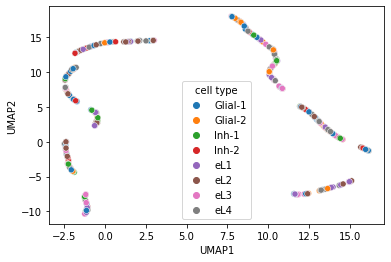

In [57]:
df_meta[["UMAP1", "UMAP2"]] = reduced_x
import seaborn as sns
sns.scatterplot(data=df_meta, x="UMAP1", y="UMAP2", hue="cell type")

In [58]:
df_meta[df_meta['cell type'] ==  "Inh-1"]

,cell type,repli,label SpiceMixPlus,UMAP1,UMAP2
1,Inh-1,0,3,-1.252368,13.374822
7,Inh-1,0,0,-1.932051,10.536453
9,Inh-1,0,1,11.944772,5.107320
18,Inh-1,0,3,-1.707355,12.927860
21,Inh-1,0,0,-2.386880,9.353327
40,Inh-1,0,3,-1.758736,12.867476
42,Inh-1,0,5,-2.403985,-1.175668
90,Inh-1,0,1,15.748613,-0.823685
139,Inh-1,0,1,11.974513,5.074157
141,Inh-1,0,2,7.985282,17.742220


In [2]:
path2adataset = Path("../tests/test_data/synthetic_500_100_20_15_0_0_i4/")
results = load_anndata(path2dataset / "trained_5_iterations.h5", [0], context={"device":"cuda:0"})

Trying to set attribute `.uns` of view, copying.
/work/magroup/shahula/spatiotemporal_transcriptomics_integration/SpiceMixPlus/SpiceMix/load_data.py:91: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at  ../torch/csrc/utils/tensor_new.cpp:201.)
  i = torch.LongTensor(indices)


In [3]:
sq.gr.spatial_neighbors(
    results[0]
)

In [35]:
import umap
reducer = umap.UMAP()
embedding = reducer.fit_transform(results[0].obsm["X"])


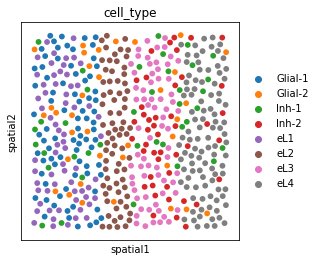

In [25]:
sc.pl.spatial(
    results[0],
    color="cell_type",
    neighbors_key="adjacency_matrix",
    edges_width=1,
    spot_size=0.03,
    img_key=None,
)

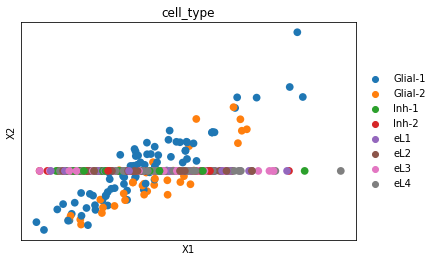

In [29]:
sc.pl.embedding(
    results[0],
    color="cell_type",
    basis="X",
)

In [ ]:
plt.plot(embedding)

hierarchical w/ K=6.ARI = -0.00
hierarchical w/ K=7.ARI = -0.00
hierarchical w/ K=8.ARI = -0.00
hierarchical w/ K=9.ARI = 0.00


Louvain clustering: res=3.16e-01:   0%|          | 0/100 [00:00<?, ?it/s]

Louvain clustering: res=1.78e-01:   0%|          | 0/100 [00:00<?, ?it/s]

ari = -0.00
ari 0 = -0.00


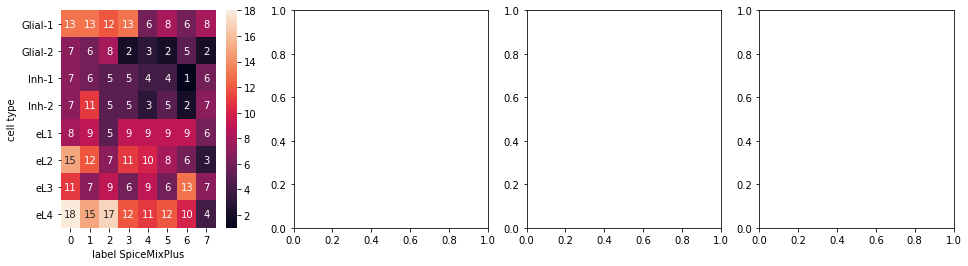

sil -0.0731412


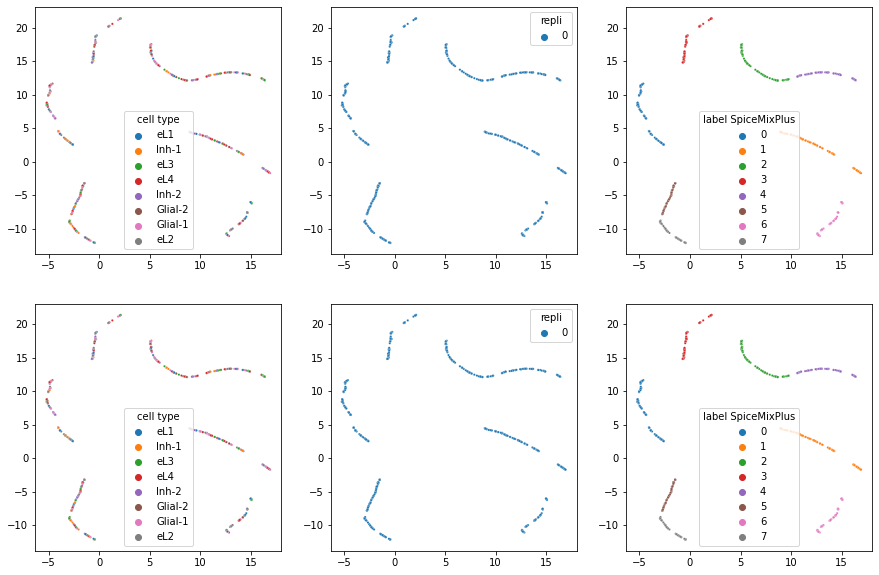

In [48]:
evaluate_embedding(obj)